# Forecasting Mini-Course Sales

### Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

### Dataset
The dataset we'll be using includes various features related to retail sales. Each row represents a unique sale and includes attributes such as date, country, product, and store identifiers. The dataset also includes a target variable 'num_sold' representing the number of products sold.

### Objective
Our main objective is to develop a predictive model that can effectively forecast future sales based on the provided features. 

### Features
- **Date:** Records the date of sales, crucial for identifying temporal patterns such as trends and seasonality
- **Country:** Indicates where the sales were recorded; essential due to varying sales patterns influenced by cultural and economic differences.
- **Store:** Identifies the store where sales occurred.
- **Product:** Identifies the sold product, recognizing distinct sales patterns based on seasonality.
- **Num Sold:** This feature represents the number of units sold for a particular product on a given date. It's the primary target variable for forecasting models, reflecting the actual sales volume that various factors (such as date, country, product, store) aim to predict and influence. 

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
X_train=pd.read_csv("Data/train.csv")
X_test=pd.read_csv("Data/test.csv")

In [3]:
# Show Top 3 Records

X_train.head(3)

id        date    country         store  \
0   0  2017-01-01  Argentina  Kaggle Learn   
1   1  2017-01-01  Argentina  Kaggle Learn   
2   2  2017-01-01  Argentina  Kaggle Learn   

                                          product  num_sold  
0               Using LLMs to Improve Your Coding        63  
1                   Using LLMs to Train More LLMs        66  
2  Using LLMs to Win Friends and Influence People         9

In [4]:
# Show Top 3 Records

X_test.head(3)

id        date    country         store  \
0  136950  2022-01-01  Argentina  Kaggle Learn   
1  136951  2022-01-01  Argentina  Kaggle Learn   
2  136952  2022-01-01  Argentina  Kaggle Learn   

                                          product  
0               Using LLMs to Improve Your Coding  
1                   Using LLMs to Train More LLMs  
2  Using LLMs to Win Friends and Influence People

In [5]:
# Shape of the dataset

X_train.shape

(136950, 6)

In [6]:
# Shape of the dataset

X_test.shape

(27375, 5)

In [7]:
# info() is used to check the Information about the data and the datatypes of each respective attribute
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27375 entries, 0 to 27374
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       27375 non-null  int64 
 1   date     27375 non-null  object
 2   country  27375 non-null  object
 3   store    27375 non-null  object
 4   product  27375 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [9]:
# Display basic statistics of the dataset
X_train.describe().T

count          mean           std  min       25%      50%  \
id        136950.0  68474.500000  39534.204020  0.0  34237.25  68474.5   
num_sold  136950.0    165.522636    183.691575  2.0     46.00     98.0   

                75%       max  
id        102711.75  136949.0  
num_sold     184.00    1380.0

**Insights**
- **Count:** There are 136,950 unique sales records in the dataset.
- **Mean:** The average ID value is 68,474.5, which suggests IDs are likely assigned sequentially.
- **Standard Deviation:** The standard deviation of 39,534.2 indicates a wide range of ID values.
- **Min and Max:** The ID ranges from 0 to 136,949, confirming the sequential nature and covering the entire dataset.

In [10]:
# Check for missing values for train data
missing_values = X_train.isnull().sum()
print(missing_values)

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64


In [11]:
# Check for missing values for test data
missing_values = X_test.isnull().sum()
print(missing_values)

id         0
date       0
country    0
store      0
product    0
dtype: int64


- Zero Missing Values in Train & test Data

In [12]:
# Check for duplicate rows for train data
duplicates = X_train.duplicated()
print(f'Total duplicate rows: {duplicates.sum()}')

Total duplicate rows: 0


In [13]:
# # Check for duplicate rows for test data
duplicate_rows_data = X_test[X_test.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

Number of duplicate rows:  (0, 5)


- Zero Duplicate Data

In [14]:
# Drop the 'id' columns from the DataFrame as they are not useful for prediction
X_train.drop(columns='id',axis=1,inplace=True)
X_test.drop(columns='id',axis=1,inplace=True)

**Seperating numerical & categorical columns**

In [15]:
numeric_features = [feature for feature in X_train.columns if X_train[feature].dtype != 'O']
categorical_features = [feature for feature in X_train.columns if X_train[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['num_sold']

We have 4 categorical features : ['date', 'country', 'store', 'product']


In [16]:
X_train['country'].unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

**Sales Trends Over Time:**
- We can plot the sales trend over time to identify any seasonality or trends.

In [17]:
X_train['date'] = pd.to_datetime(X_train['date'])
X_test['date'] = pd.to_datetime(X_test['date'])

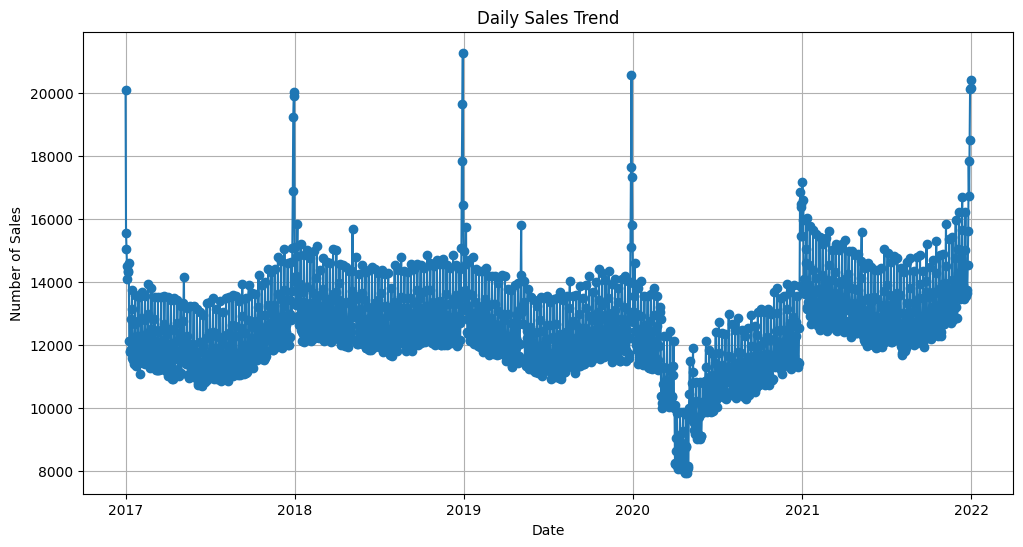

In [18]:
# Set 'date' column as the index

X_train_copy = X_train.copy()

X_train_copy.set_index('date', inplace=True)


# Group sales by date and sum
daily_sales = X_train_copy.resample('D').sum()

# Plot daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales['num_sold'], marker='o', linestyle='-')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

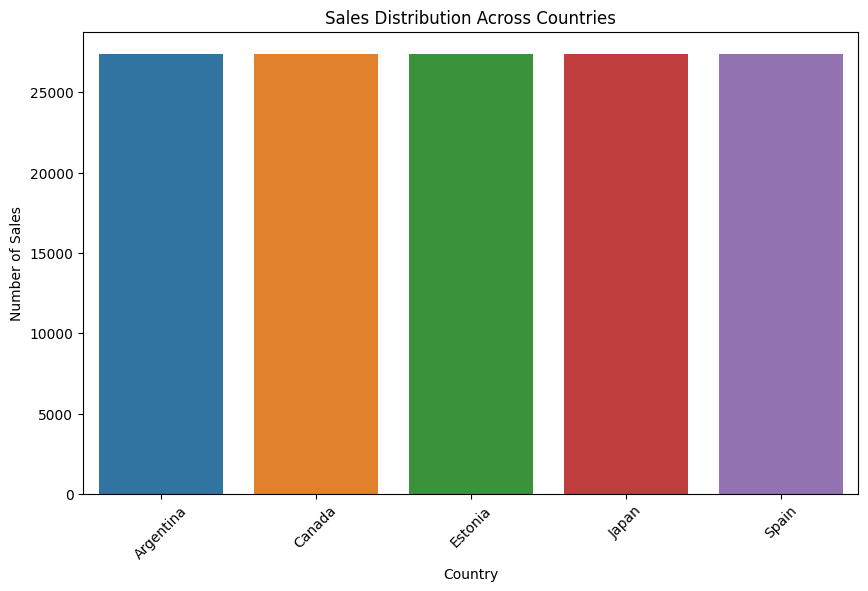

In [19]:
# Sales distribution across countries
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=X_train)
plt.title('Sales Distribution Across Countries')
plt.xlabel('Country')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

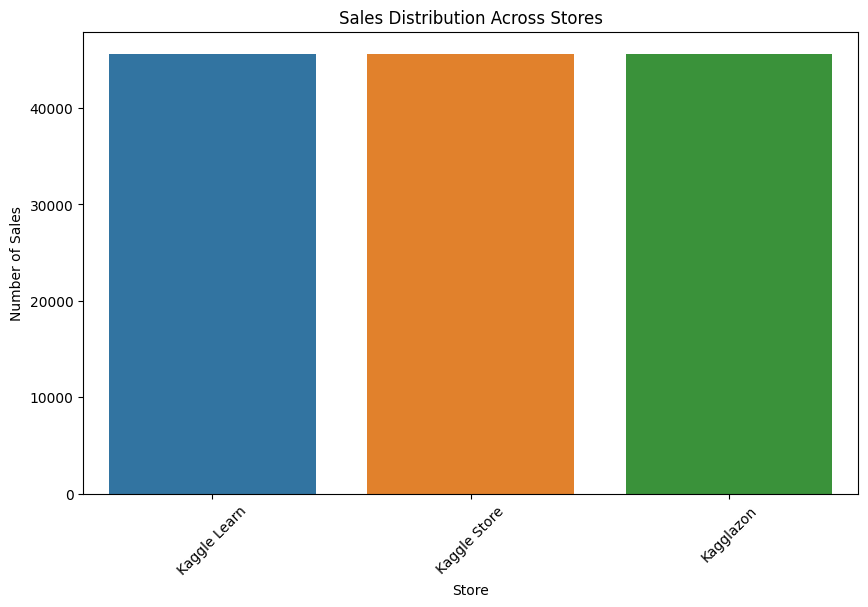

In [20]:
# Sales distribution across stores
plt.figure(figsize=(10, 6))
sns.countplot(x='store', data=X_train)
plt.title('Sales Distribution Across Stores')
plt.xlabel('Store')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

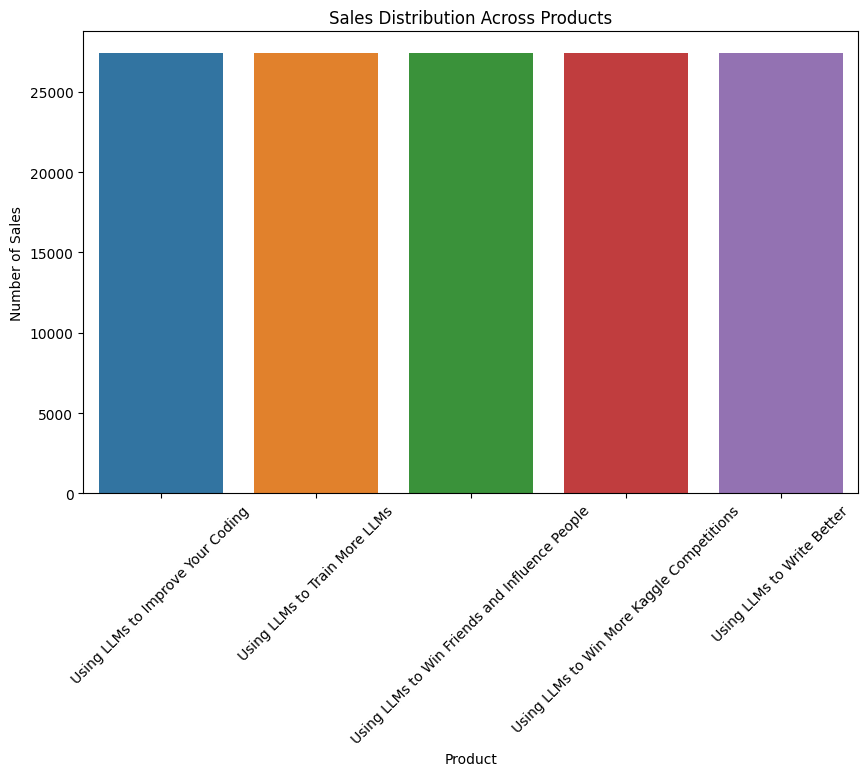

In [21]:
# Sales distribution across products
plt.figure(figsize=(10, 6))
sns.countplot(x='product', data=X_train)
plt.title('Sales Distribution Across Products')
plt.xlabel('Product')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

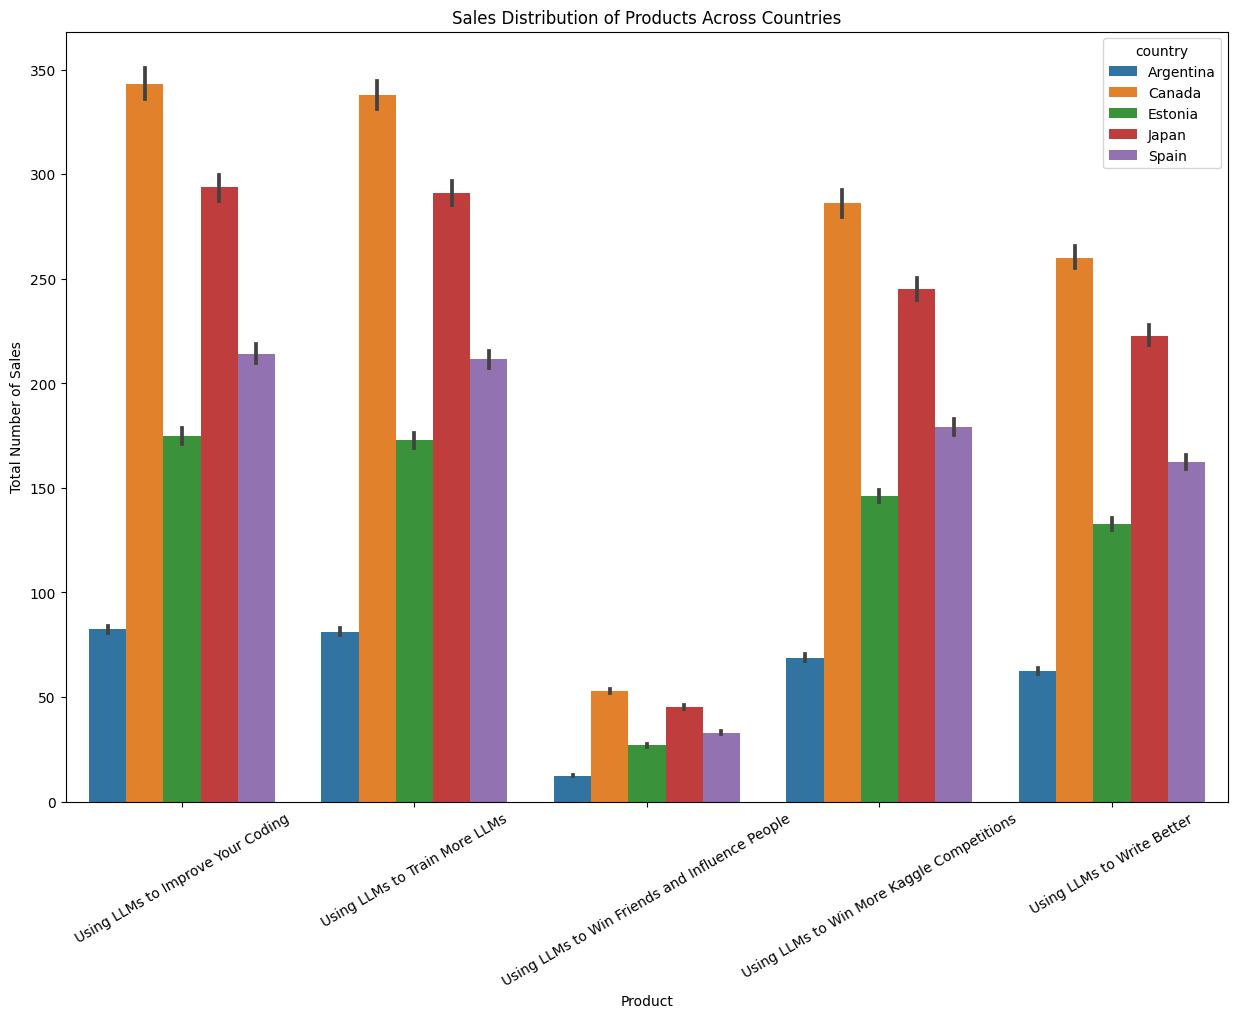

In [22]:
plt.figure(figsize = (15, 10))

ax = sns.barplot(data = X_train, x = 'product', y = 'num_sold', hue = 'country')
plt.title('Sales Distribution of Products Across Countries')
plt.ylabel('Total Number of Sales')
plt.xlabel('Product')
plt.xticks(rotation = 30);

**Insights**
- All products are sold in all the countries.
- `Using LLMs to Improve Your Coding` is the most sold product across the countries.
- `Using LLMS to Win Friends and Influence People` is the least sold product across the countries.
- `Canada` is the country with the highest sales.
- `Argentina` is the country with the least sales.

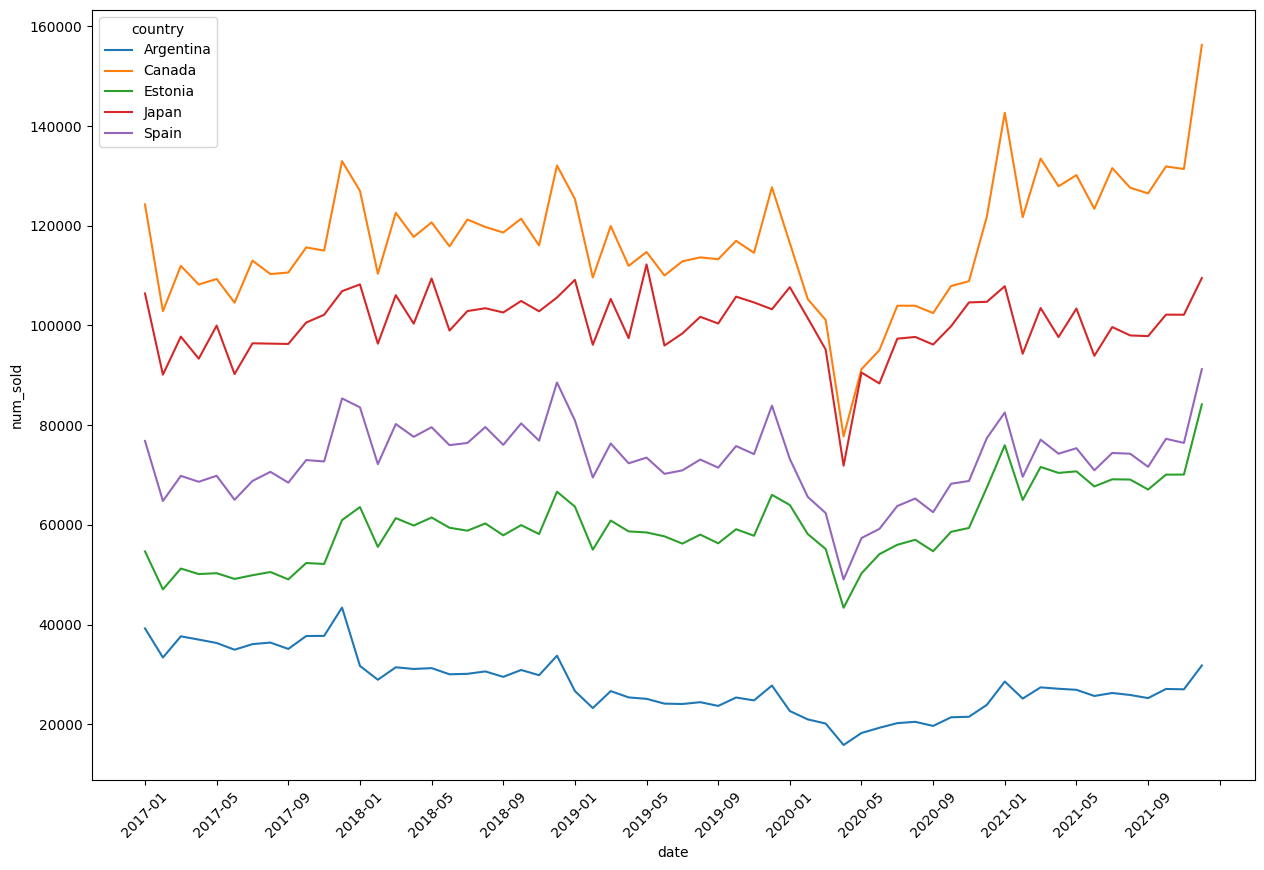

In [23]:
import matplotlib.ticker as ticker
plt.figure(figsize = (15, 10))

ax = sns.lineplot(data = X_train.groupby([X_train.date.dt.strftime('%Y-%m'), X_train.country])['num_sold'].sum().reset_index(),
                  x = 'date',
                  y = 'num_sold',
                  hue ='country')

ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))
plt.xticks(rotation = 45);

**Insights**
-  we see that all the countries experience a significant decrease in sales in March and April of 2020 due to the pandemic.

In [24]:
def plot_unique_percentage_column(X_train, column_label):
    column_values = X_train[column_label]
    total_values = column_values.count()
    unique_values = column_values.nunique()
    unique_percentage = (unique_values / total_values) * 100

    plt.figure(figsize=(6, 4))
    plt.bar([column_label], [unique_percentage])
    plt.xlabel('Column')
    plt.ylabel('Unique Value Percentage')
    plt.title('Unique Value Percentage in Column: {}'.format(column_label))
    plt.ylim(0, 100)  # Set the y-axis limit to 0-100 for percentage representation
    plt.show()

In [25]:
def extract_date_components(X_train, date_column):
    X_train[date_column] = pd.to_datetime(X_train[date_column])  # Convert date column to datetime format
    
    X_train['year'] = X_train[date_column].dt.year
    X_train['month'] = X_train[date_column].dt.month
    X_train['day'] = X_train[date_column].dt.day
    X_train['week_of_year'] = X_train[date_column].dt.isocalendar().week
    X_train['day_of_week'] = X_train[date_column].dt.dayofweek


    X_train["week_of_year"] = X_train["week_of_year"].astype("int32")
    return X_train


X_train=extract_date_components(X_train=X_train,date_column='date')


X_test=extract_date_components(X_train=X_test,date_column='date')

In [26]:
# Find earliest and latest dates
earliest_date = X_train['date'].min().date()
latest_date = X_train['date'].max().date()

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2017-01-01
Latest Date: 2021-12-31


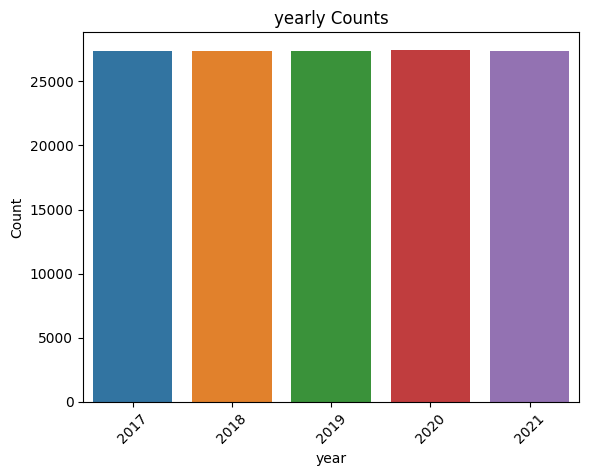

In [27]:
def plot_year_counts(X_train, date_column):
    
    # Group the DataFrame by the year column and count the occurrences of each year
    year_counts = X_train['year'].value_counts().sort_index()

    # Create a count plot using seaborn
    sns.countplot(x='year', data=X_train)

    # Set the labels and title
    plt.xlabel("year")
    plt.ylabel("Count")
    plt.title("yearly Counts")

    # Rotate the x-axis labels for better readability if needed
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()
    
plot_year_counts(X_train=X_train,date_column='date')

In [28]:
X_train.columns

Index(['date', 'country', 'store', 'product', 'num_sold', 'year', 'month',
       'day', 'week_of_year', 'day_of_week'],
      dtype='object')

In [29]:
X_train[['product']]

product
0                    Using LLMs to Improve Your Coding
1                        Using LLMs to Train More LLMs
2       Using LLMs to Win Friends and Influence People
3           Using LLMs to Win More Kaggle Competitions
4                           Using LLMs to Write Better
...                                                ...
136945               Using LLMs to Improve Your Coding
136946                   Using LLMs to Train More LLMs
136947  Using LLMs to Win Friends and Influence People
136948      Using LLMs to Win More Kaggle Competitions
136949                      Using LLMs to Write Better

[136950 rows x 1 columns]

In [30]:
X_train['product'] = X_train['product'].str.replace('Using LLMs to ', "")
X_test['product'] = X_test['product'].str.replace('Using LLMs to ', "")

In [31]:
X_train[['product']]

product
0                    Improve Your Coding
1                        Train More LLMs
2       Win Friends and Influence People
3           Win More Kaggle Competitions
4                           Write Better
...                                  ...
136945               Improve Your Coding
136946                   Train More LLMs
136947  Win Friends and Influence People
136948      Win More Kaggle Competitions
136949                      Write Better

[136950 rows x 1 columns]

In [32]:
# Create a DataFrame to count the number of occurrences for each country
country_counts = X_train['country'].value_counts().reset_index()
country_counts.columns = ['country', 'num_sold']

# Create the world map plot using choropleth
fig = px.choropleth(country_counts,
                    locations='country',  # column with country codes or names
                    locationmode='country names',  # use 'ISO-3' for 3-letter ISO country codes
                    color='num_sold',  # value to be color-coded
                    hover_name='country',  # column to be used as hover information
                    title='Number of Sales by Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

# Update plot layout
fig.update_layout(
    margin=dict(t=50, l=50, r=50, b=50),
    font=dict(size=12),  # Set font size
    title_font=dict(size=16, family="Arial"),  # Set title font size and family
    legend=dict(font=dict(size=10)),  # Set legend font size
    geo=dict(
        showframe=False,  # Hide the frame around the map
        showcoastlines=True,  # Show coastlines on the map
        projection_type='natural earth'  # Set the map projection type
    ),
)

fig.show()

In [33]:
def plot_unique_value_percentages_columns(df, column_labels):
    num_columns = len(column_labels)
    rows = (num_columns + 1) // 2  # Calculate the number of rows needed to display 2 figures per row
    fig, axs = plt.subplots(rows, 2, figsize=(12, 6 * rows))  # Create subplots with 2 figures per row

    for i, column_name in enumerate(column_labels):
        # Count the occurrences of each unique value in the column
        value_counts = df[column_name].value_counts()

        # Calculate the percentage of each unique value
        percentages = (value_counts / len(df)) * 100

        # Calculate the row and column indices for the subplot
        row = i // 2
        col = i % 2

        # If there is only one column left to plot, handle it in the last row
        if i == num_columns - 1 and num_columns % 2 != 0:
            ax = axs[rows - 1, col]  # Use the subplot in the last row for the last column
        else:
            ax = axs[row, col]

        # Plot the percentages as a pie chart
        ax.pie(percentages, labels=percentages.index, autopct='%.2f%%', startangle=90, colors=plt.cm.Paired.colors)

        # Customize the plot aesthetics
        ax.set_title(f'Percentages of Unique Values in "{column_name}"', fontsize=14, pad=20)  # Add padding to the title

    # If there's an odd number of rows, remove the last subplot in the last row to center the plot
    if num_columns % 2 != 0:
        axs[-1, -1].remove()

    # Adjust the spacing between the subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

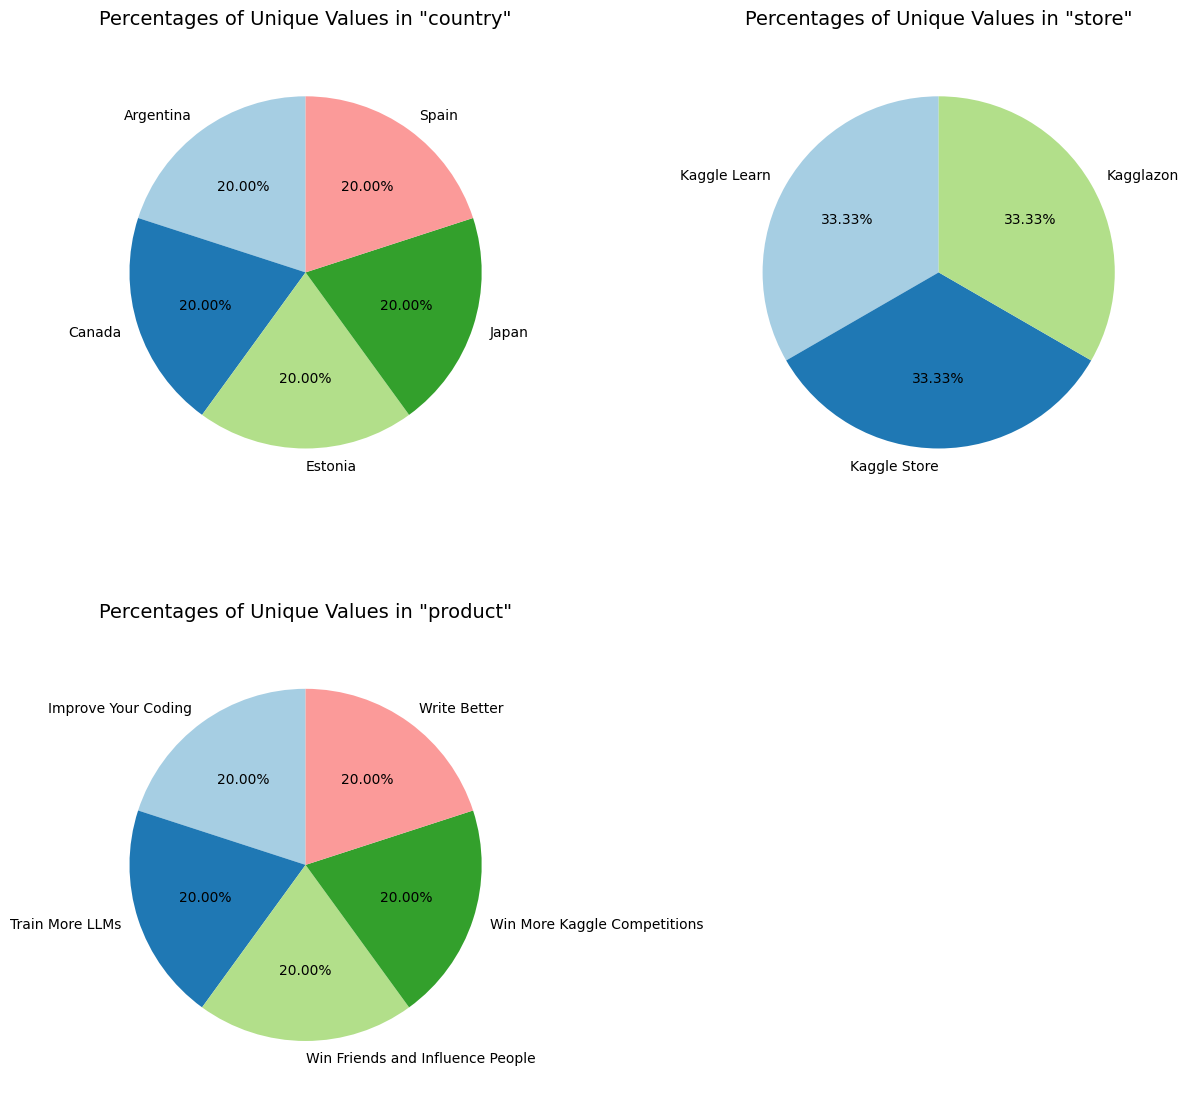

In [34]:
plot_unique_value_percentages_columns(df=X_train,column_labels=['country','store','product'])

In [35]:
X_train.head()

date    country         store                           product  \
0 2017-01-01  Argentina  Kaggle Learn               Improve Your Coding   
1 2017-01-01  Argentina  Kaggle Learn                   Train More LLMs   
2 2017-01-01  Argentina  Kaggle Learn  Win Friends and Influence People   
3 2017-01-01  Argentina  Kaggle Learn      Win More Kaggle Competitions   
4 2017-01-01  Argentina  Kaggle Learn                      Write Better   

   num_sold  year  month  day  week_of_year  day_of_week  
0        63  2017      1    1            52            6  
1        66  2017      1    1            52            6  
2         9  2017      1    1            52            6  
3        59  2017      1    1            52            6  
4        49  2017      1    1            52            6

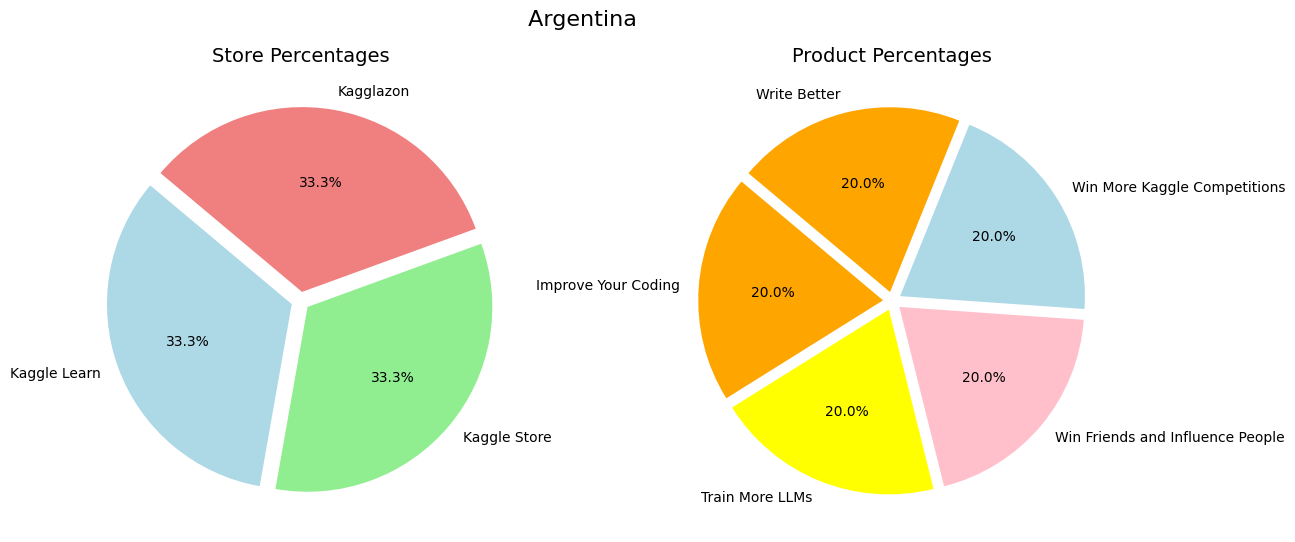

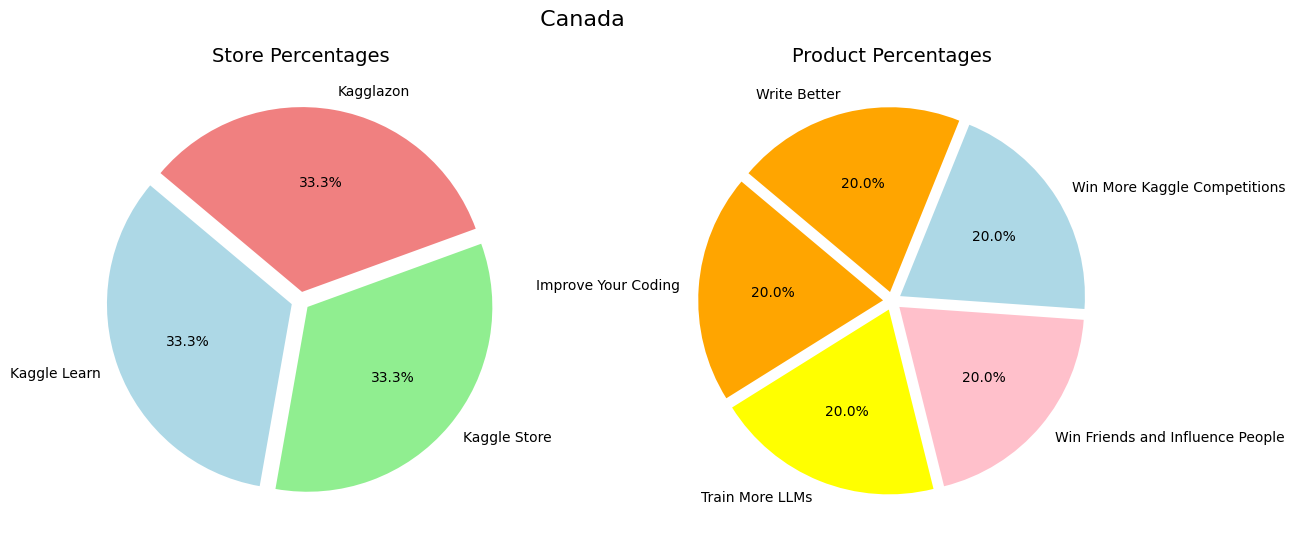

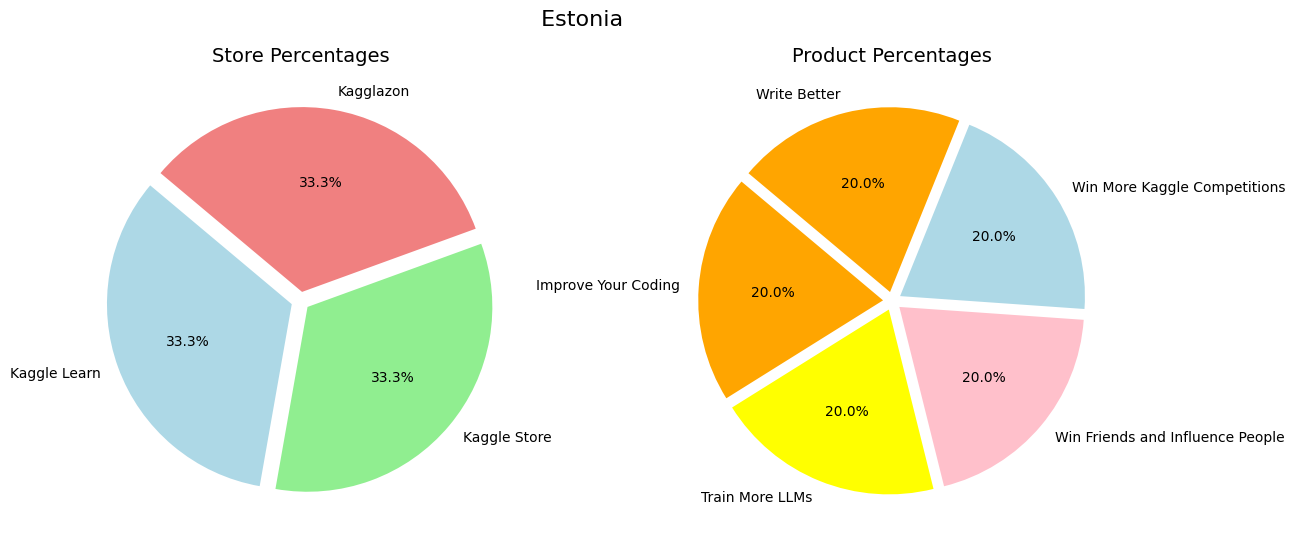

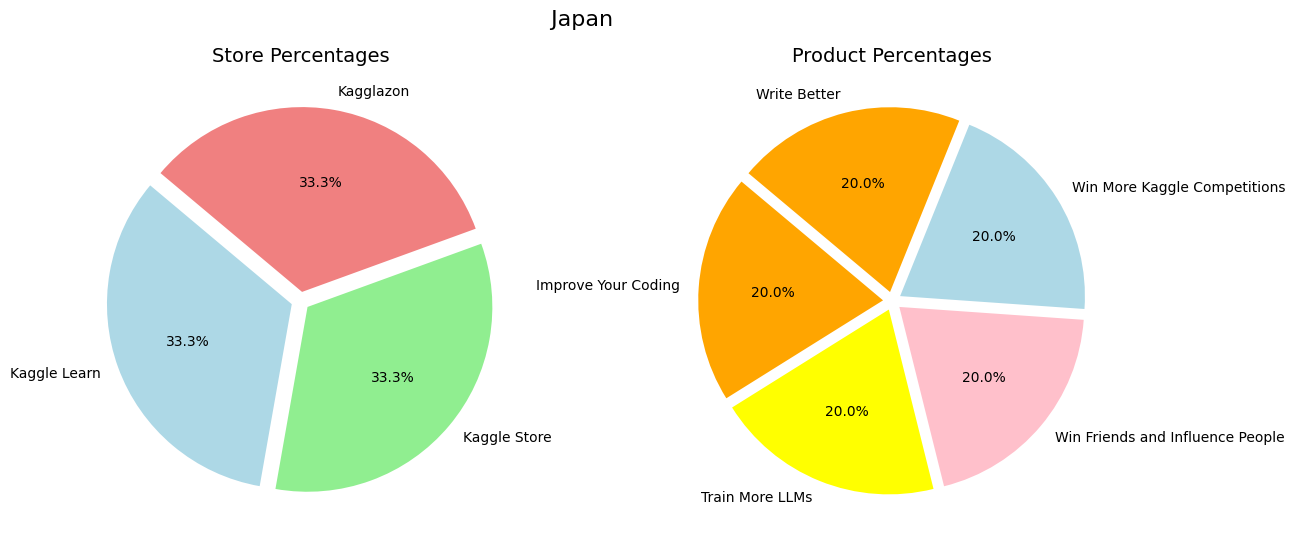

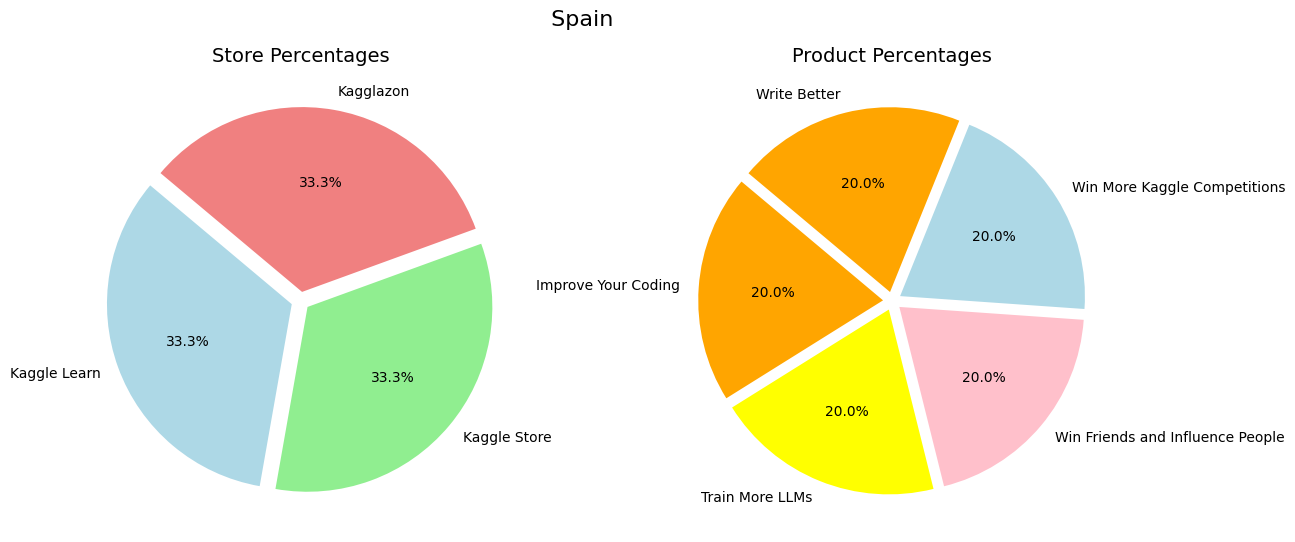

In [36]:
def plot_percentage_per_county(dataframe):
    # Step 1: Separate data into different dataframes for each unique 'county'
    country_dataframes = {county: group for county, group in dataframe.groupby('country')}
    
    # Custom color palettes for stores and products
    store_colors = ['lightblue', 'lightgreen', 'lightcoral']
    product_colors = ['orange', 'yellow', 'pink', 'lightblue']

    # Step 2 and 3: Calculate percentages and plot for each unique 'county'
    for country, country_df in country_dataframes.items():
        percentages_store = country_df['store'].value_counts(normalize=True) * 100
        percentages_product = country_df['product'].value_counts(normalize=True) * 100

        # Create subplots for store and product percentages
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))
        fig.suptitle(f' {country}', fontsize=16)

        # Plot store percentages
        axes[0].pie(percentages_store, labels=percentages_store.index, colors=store_colors,
                   autopct='%1.1f%%', startangle=140, explode=[0.05] * len(percentages_store))
        axes[0].set_title('Store Percentages', fontsize=14)

        # Plot product percentages
        axes[1].pie(percentages_product, labels=percentages_product.index, colors=product_colors,
                   autopct='%1.1f%%', startangle=140, explode=[0.05] * len(percentages_product))
        axes[1].set_title('Product Percentages', fontsize=14)

        plt.show()
        
plot_percentage_per_county(dataframe=X_train)

In [37]:
fig = px.sunburst(X_train,
                  path=['country', 'store', 'product'],
                  values='num_sold',
                  title='Distribution of Data')

# Update plot layout
fig.update_layout(
    margin=dict(t=50, l=50, r=50, b=50),
    sunburstcolorway=["#636EFA", "#EF553B", "#00CC96"],  # Customize color scheme
    bargap=0.1,  # Adjust gap between bars
    font=dict(size=12),  # Set font size
    title_font=dict(size=16, family="Arial"),  # Set title font size and family
    legend=dict(font=dict(size=10)),  # Set legend font size
    height=600,  # Set the height of the plot to 600 pixels
    width=800,   # Set the width of the plot to 800 pixels
)

# Update tooltip formatting
fig.update_traces(hovertemplate='<b>%{label}</b><br>Num Sold: %{value}')

fig.show()

In [38]:
def get_gdp(countries, years):
    alpha3 = {
        'Argentina': 'ARG',
        'Canada': 'CAN',
        'Estonia': 'EST',
        'Japan': 'JPN',
        'Spain': 'ESP'
        
    }

    gdp_data_list = []

    for country in countries:
        alpha3_code = alpha3.get(country)
        if alpha3_code:
            for year in years:
                gdp_value = get_gdp_for_year(alpha3_code, year)
                if gdp_value is not None:
                    gdp_data_list.append((country, year, gdp_value))

    columns = ['country', 'year', 'gdp']
    gdp_data_df = pd.DataFrame(gdp_data_list, columns=columns)
    return gdp_data_df

def get_gdp_for_year(alpha3_code, year):
    url = f"https://api.worldbank.org/v2/country/{alpha3_code}/indicator/NY.GDP.PCAP.CD?date={year}&format=json"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if len(data) > 1 and len(data[1]) > 0:
            return data[1][0]['value']
    return None

In [39]:
countries_list = ['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain']
years_list = [2017, 2018, 2019, 2020, 2021,2022]

gdp_data_df = get_gdp(countries_list, years_list)

gdp_data_df

country  year           gdp
0   Argentina  2017  14613.035649
1   Argentina  2018  11795.162745
2   Argentina  2019   9963.674162
3   Argentina  2020   8500.837939
4   Argentina  2021  10650.860460
5   Argentina  2022  13650.604629
6      Canada  2017  45129.628117
7      Canada  2018  46539.176157
8      Canada  2019  46352.869345
9      Canada  2020  43537.839299
10     Canada  2021  52496.844169
11     Canada  2022  55509.393176
12    Estonia  2017  20437.765377
13    Estonia  2018  23165.849479
14    Estonia  2019  23581.656837
15    Estonia  2020  23565.175944
16    Estonia  2021  27698.479345
17    Estonia  2022  28114.143176
18      Japan  2017  38834.052934
19      Japan  2018  39751.133098
20      Japan  2019  40415.956765
21      Japan  2020  40040.765506
22      Japan  2021  40058.537328
23      Japan  2022  34017.271808
24      Spain  2017  28185.321367
25      Spain  2018  30379.721113
26      Spain  2019  29581.518551
27      Spain  2020  26984.296277
28      Spain  2021  30488.820953
29      Spain  2022  29674.544286

In [40]:
!pip install wbdata

You should consider upgrading via the 'c:\users\shiva\desktop\client_project\new_env\scripts\python.exe -m pip install --upgrade pip' command.


In [41]:
import wbdata
def generate_economical_data(years_list):
    country_codes = {
        'Argentina': 'ARG',
        'Canada': 'CAN',
        'Estonia': 'EST',
        'Japan': 'JPN',
        'Spain': 'ESP'
    }
    
    infl_data_list = []
    unem_data_list = []
    
    for country, code in country_codes.items():
        data_unem = wbdata.get_dataframe(indicators={"SL.UEM.TOTL.ZS": "unemployment"}, country=code)
        data_unem.reset_index(inplace=True)
        data_unem = data_unem.rename(columns={'unemployment': 'unemployment', 'country': 'country_code'})
        # Convert 'date' to datetime type
        data_unem['date'] = pd.to_datetime(data_unem['date'])
        # Filter the rows by the years_list
        data_unem = data_unem[data_unem['date'].dt.year.isin(years_list)]
        # Add 'country' column
        data_unem['country'] = country
        unem_data_list.append(data_unem)
        
        data_infl = wbdata.get_dataframe(indicators={"FP.CPI.TOTL.ZG": "inflation"}, country=code)
        data_infl.reset_index(inplace=True)
        data_infl = data_infl.rename(columns={'inflation': 'inflation', 'country': 'country_code'})
        # Convert 'date' to datetime type
        data_infl['date'] = pd.to_datetime(data_infl['date'])
        # Filter the rows by the years_list
        data_infl = data_infl[data_infl['date'].dt.year.isin(years_list)]
        # Add 'country' column
        data_infl['country'] = country
        infl_data_list.append(data_infl)
    
    unem_data = pd.concat(unem_data_list)
    infl_data = pd.concat(infl_data_list)
    
    unem_data['date'] = unem_data['date'].dt.year.astype(int)
    infl_data['date'] = infl_data['date'].dt.year.astype(int)
    
    # Rename the 'date' columns to 'year'
    unem_data = unem_data.rename(columns={'date': 'year'})
    infl_data = infl_data.rename(columns={'date': 'year'})
    
    return infl_data, unem_data

In [42]:
inflation_data,unemployment_data=generate_economical_data(years_list = [2017, 2018, 2019, 2020, 2021,2022])

In [43]:
inflation_data.head()

year  inflation    country
1  2022        NaN  Argentina
2  2021        NaN  Argentina
3  2020        NaN  Argentina
4  2019        NaN  Argentina
5  2018        NaN  Argentina

In [44]:
unemployment_data.head()

year  unemployment    country
1  2022         6.805  Argentina
2  2021         8.736  Argentina
3  2020        11.461  Argentina
4  2019         9.843  Argentina
5  2018         9.221  Argentina

In [45]:
def fill_nan_with_median_by_year(df=inflation_data, country_name='Argentina', year_col='year', inflation_col='inflation'):
    """
    Fill NaN values in the specified 'inflation_col' column of the given DataFrame 'df' for the given 'country_name',
    using the median of values filtered by the 'year_col' column.

    """

    # Step 1: Group data by year for the specified country
    grouped_data = df[df['country'] != country_name].groupby(year_col)

    # Step 2: Calculate the median of 'inflation' for each group
    median_inflation_by_year = grouped_data[inflation_col].median()

    # Step 3: Fill NaN values in 'inflation_col' with the corresponding group's median value
    filled_df = df.copy()
    for year, median_value in median_inflation_by_year.items():
        mask = (filled_df['country'] == country_name) & (filled_df[year_col] == year)
        filled_df.loc[mask, inflation_col] = filled_df.loc[mask, inflation_col].fillna(median_value)

    return filled_df

inflation_data=fill_nan_with_median_by_year()

In [46]:
inflation_data

year  inflation    country
1  2022   7.596689  Argentina
2  2021   3.244164  Argentina
3  2020  -0.173874  Argentina
4  2019   1.324394  Argentina
5  2018   1.971604  Argentina
6  2017   1.776480  Argentina
1  2022   6.802801     Canada
2  2021   3.395193     Canada
3  2020   0.717000     Canada
4  2019   1.949269     Canada
5  2018   2.268226     Canada
6  2017   1.596884     Canada
1  2022  19.398263    Estonia
2  2021   4.653167    Estonia
3  2020  -0.444531    Estonia
4  2019   2.277259    Estonia
5  2018   3.436327    Estonia
6  2017   3.417235    Estonia
1  2022   2.497703      Japan
2  2021  -0.233353      Japan
3  2020  -0.024996      Japan
4  2019   0.468776      Japan
5  2018   0.989095      Japan
6  2017   0.484200      Japan
1  2022   8.390576      Spain
2  2021   3.093135      Spain
3  2020  -0.322753      Spain
4  2019   0.699519      Spain
5  2018   1.674981      Spain
6  2017   1.956076      Spain

In [47]:
inflation_data.isna().sum()

year         0
inflation    0
country      0
dtype: int64

In [48]:
def merge_with_inflation_and_unemployment(df,inflation_data=inflation_data,unemployment_data=unemployment_data,gdp_data=gdp_data_df):
    """
    Merge the input DataFrame 'df' with 'inflation_data' and 'unemployment_data'
    based on 'year' and 'country'.

    Parameters:
        df (pd.DataFrame): The main DataFrame to merge with.

    Returns:
        pd.DataFrame: The merged DataFrame.
    """

    df = pd.merge(df, inflation_data, on=['year', 'country'], how='left')
    df = pd.merge(df, unemployment_data, on=['year', 'country'], how='left')
    df = pd.merge(df, gdp_data, on=['year', 'country'], how='left')
  #  df = pd.merge(df, google_data, on=['year', 'month'], how='left')
    

    return df
X_train=merge_with_inflation_and_unemployment(X_train)
X_test=merge_with_inflation_and_unemployment(X_test)

In [49]:
X_train.isna().sum()

date            0
country         0
store           0
product         0
num_sold        0
year            0
month           0
day             0
week_of_year    0
day_of_week     0
inflation       0
unemployment    0
gdp             0
dtype: int64

In [50]:
X_test.isna().sum()

date            0
country         0
store           0
product         0
year            0
month           0
day             0
week_of_year    0
day_of_week     0
inflation       0
unemployment    0
gdp             0
dtype: int64

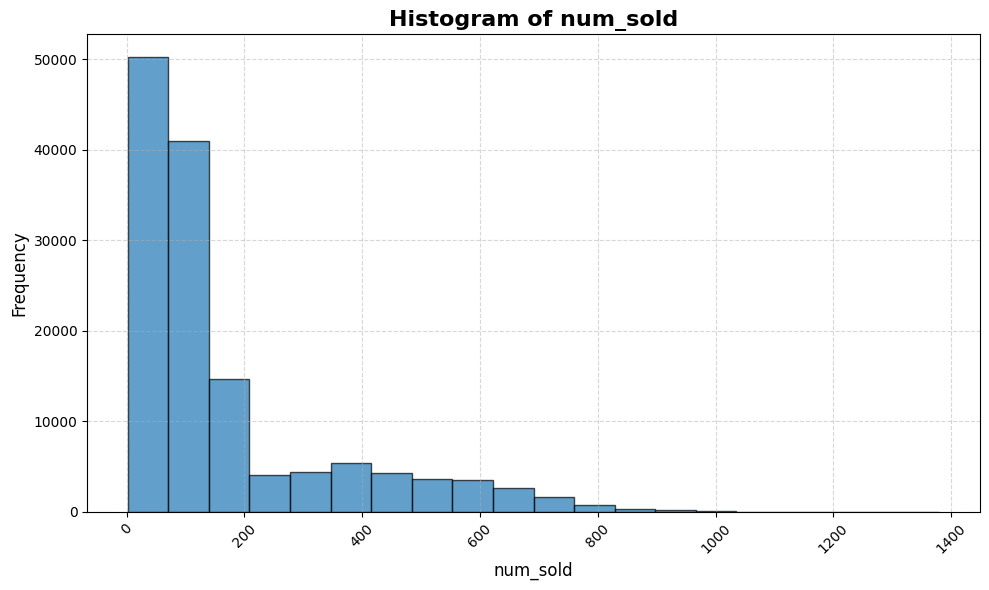

In [51]:
def plot_histogram(df, column_label):
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    
    # Increase the number of bins for a more detailed histogram
    plt.hist(df[column_label], bins=20, edgecolor='black', alpha=0.7)  # Added transparency (alpha)
    
    plt.xlabel(column_label, fontsize=12)  # Increased x-axis label font size
    plt.ylabel('Frequency', fontsize=12)  # Increased y-axis label font size
    plt.title(f'Histogram of {column_label}', fontsize=16, fontweight='bold')  # Increased title font size and weight
    
    plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and increased tick label size
    plt.yticks(fontsize=10)  # Increased tick label size for y-axis
    
    plt.grid(True, linestyle='--', alpha=0.5)  # Added grid lines with transparency
    
    plt.tight_layout()  # Improved spacing between plot elements
    
    plt.show()

plot_histogram(df=X_train, column_label='num_sold')

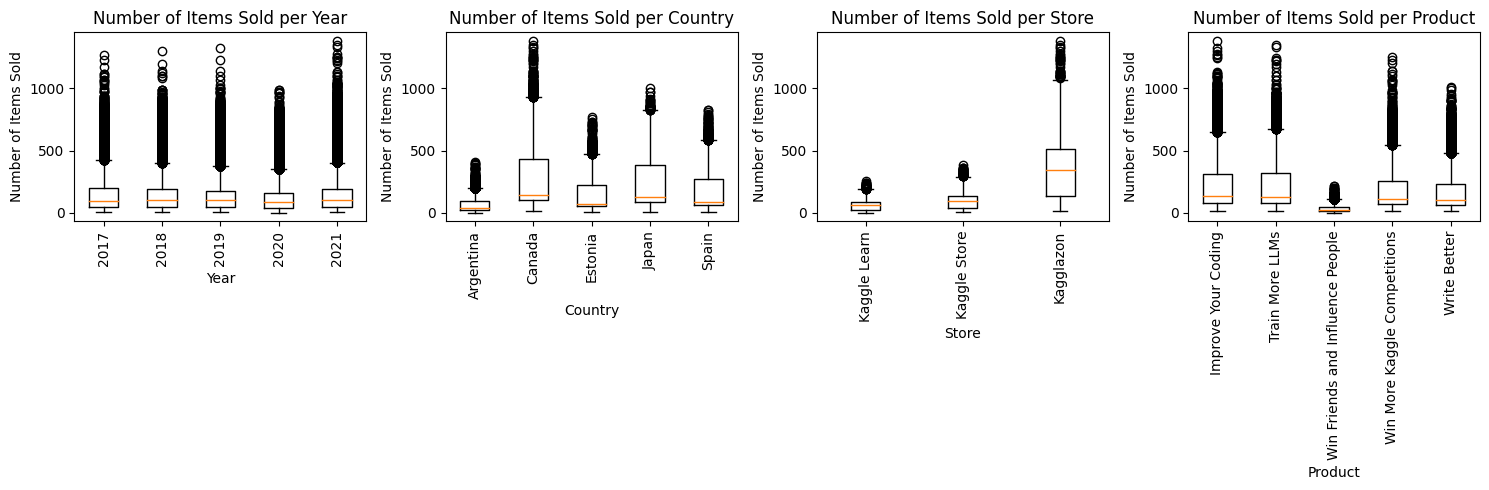

In [52]:
def plot_boxplot(df, y):
    # Calculate the dimensions for subplots
    num_cols = len(y)
    num_rows = 1

    # Create a figure and subplots
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5))

    # Looping over each column in the list
    for i, column in enumerate(y):
        # Creating an empty list to store the data for each group
        data = []

        # Looping over unique values in the specified column
        for value in df[column].unique():
            filtered_df = df[df[column] == value]
            # Extracting the num_sold column from the filtered dataframe
            num_sold = filtered_df['num_sold']
            # Appending the data to the list
            data.append(num_sold)

        # Plotting the boxplot in the corresponding subplot
        axs[i].boxplot(data)

        # Adding labels and title
        axs[i].set_xlabel(column.capitalize())
        axs[i].set_ylabel('Number of Items Sold')
        axs[i].set_title(f'Number of Items Sold per {column.capitalize()}')

        # Modifying the x-axis tick labels and tilting them to 90 degrees
        axs[i].set_xticklabels(df[column].unique(), rotation=90)

    # Adjust spacing between subplots
    plt.tight_layout()

    # Displaying the plots
    plt.show()

plot_boxplot(df=X_train,y=['year', 'country', 'store', 'product'])

In [53]:
def plot_line_by_column(df, column):
    # Set up plot styling
    sns.set_style("darkgrid")
    sns.set_palette("Set2")

    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(12, 8))

    # Iterate over each unique value in the column and create a line plot
    for value in df[column].unique():
        # Filter the data frame for the current value
        filtered_df_value = df[df[column] == value]
        
        # Create a line plot for the current value
        sns.lineplot(data=filtered_df_value, x='year', y='num_sold', label=value)

    # Set plot title and labels
    plt.title(f'Line Plot for {column} by Year')
    plt.xlabel('Year')
    plt.ylabel('Num of Sold')

    # Adjust the legend placement
    plt.legend(title=column, loc='upper left', bbox_to_anchor=(1.0, 1.0))

    # Set x-axis tick labels to integers
    plt.xticks(list(range(int(df['year'].min()), int(df['year'].max())+1)))

    # Show the plot
    plt.show()

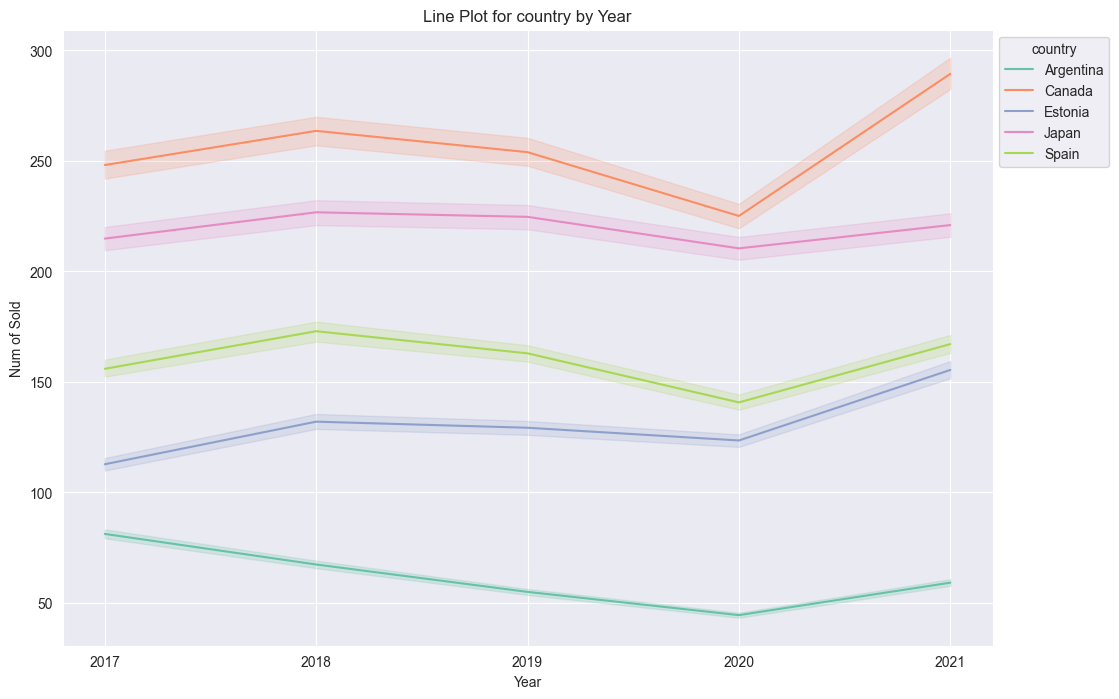

In [54]:
plot_line_by_column(df=X_train,column='country')

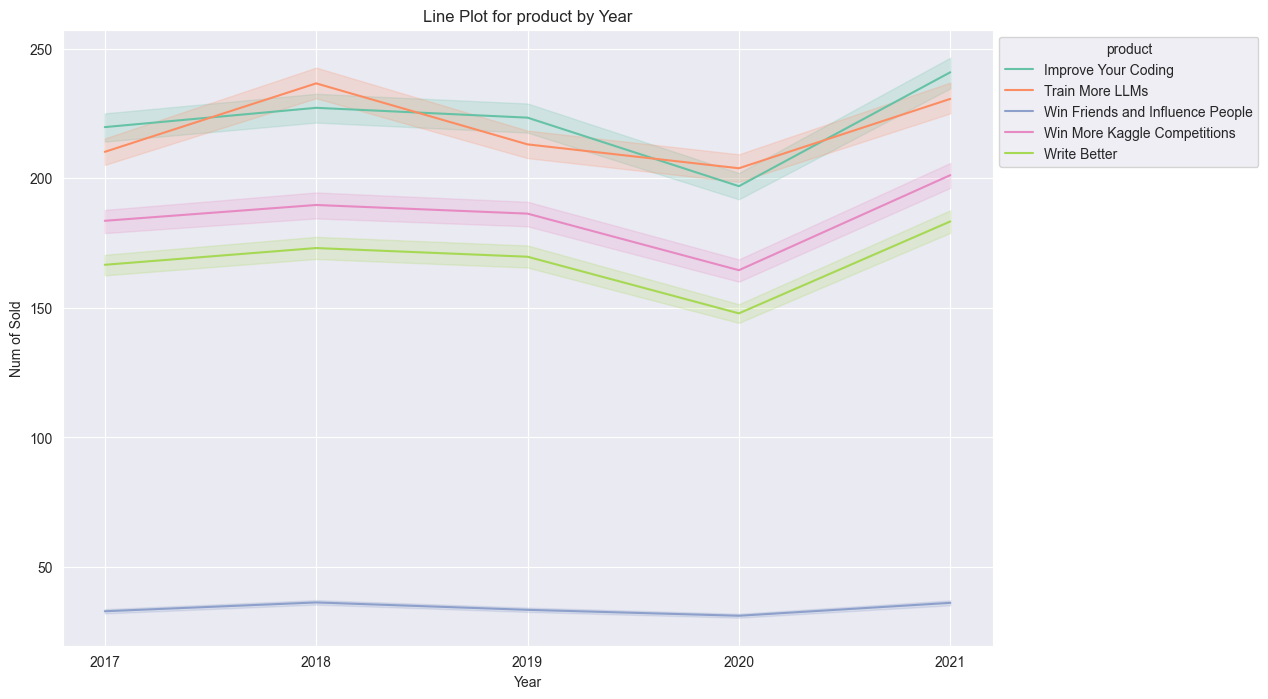

In [55]:
plot_line_by_column(df=X_train,column='product')

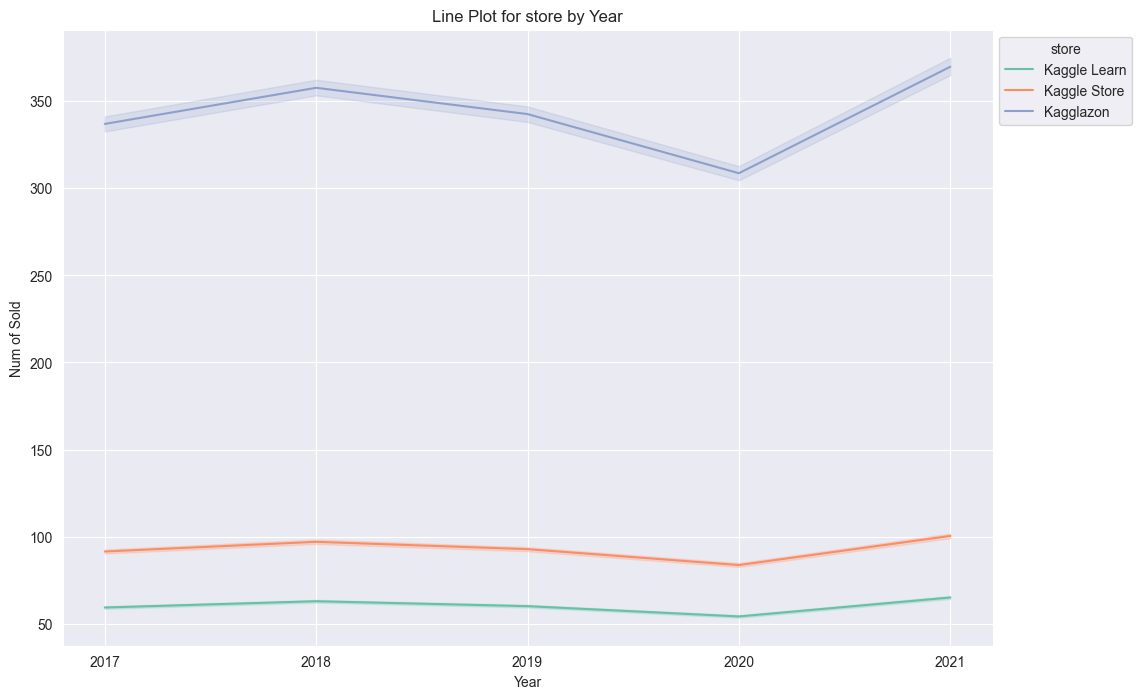

In [56]:
plot_line_by_column(df=X_train,column='store')

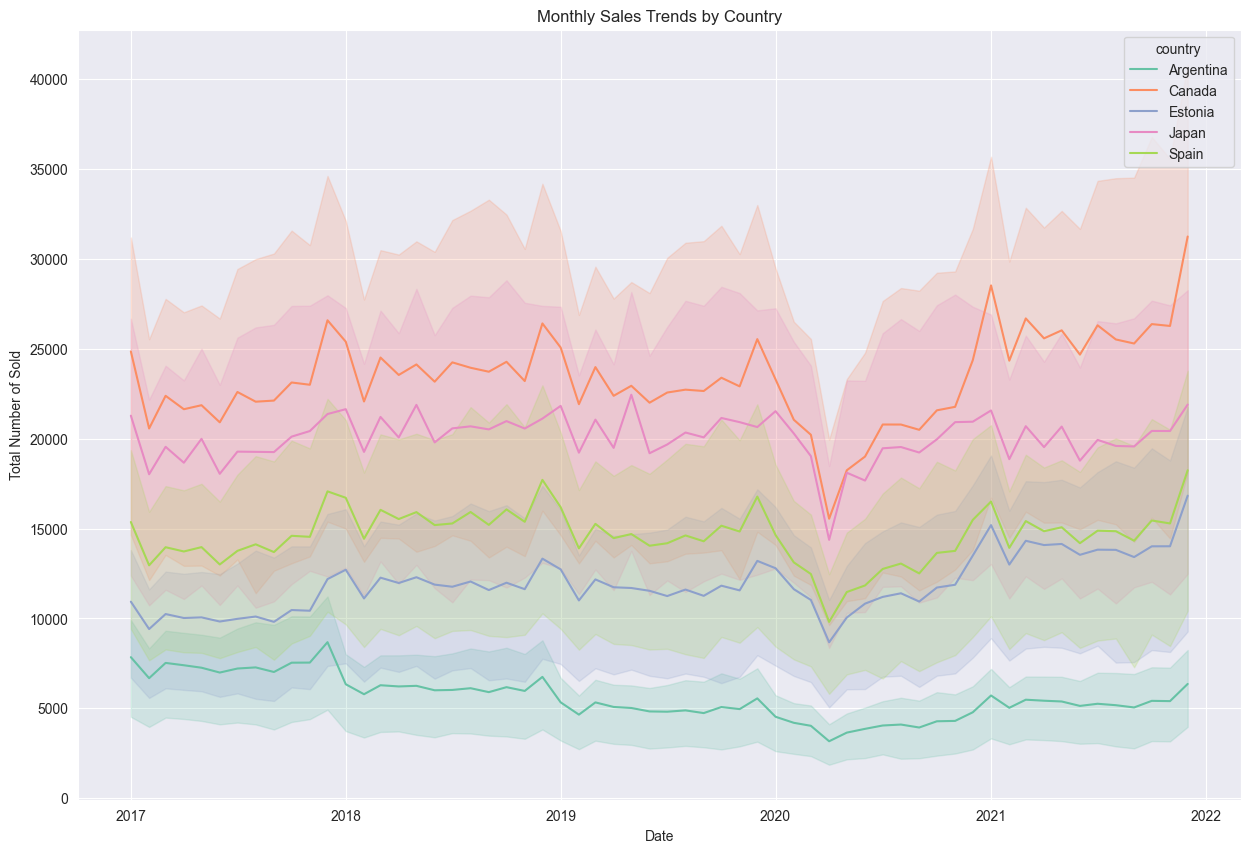

In [57]:
# Aggregate monthly sales data by country and product
monthly_sales = X_train.groupby([X_train['date'].dt.to_period('M'), 'country', 'product'])['num_sold'].sum().reset_index()
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

# Plot sales trends for different countries
plt.figure(figsize=(15, 10))
sns.lineplot(data=monthly_sales, x='date', y='num_sold', hue='country')
plt.title('Monthly Sales Trends by Country')
plt.xlabel('Date')
plt.ylabel('Total Number of Sold')
plt.show()

### Time Series Analysis

In [58]:
X_train.head()

date    country         store                           product  \
0 2017-01-01  Argentina  Kaggle Learn               Improve Your Coding   
1 2017-01-01  Argentina  Kaggle Learn                   Train More LLMs   
2 2017-01-01  Argentina  Kaggle Learn  Win Friends and Influence People   
3 2017-01-01  Argentina  Kaggle Learn      Win More Kaggle Competitions   
4 2017-01-01  Argentina  Kaggle Learn                      Write Better   

   num_sold  year  month  day  week_of_year  day_of_week  inflation  \
0        63  2017      1    1            52            6    1.77648   
1        66  2017      1    1            52            6    1.77648   
2         9  2017      1    1            52            6    1.77648   
3        59  2017      1    1            52            6    1.77648   
4        49  2017      1    1            52            6    1.77648   

   unemployment           gdp  
0         8.347  14613.035649  
1         8.347  14613.035649  
2         8.347  14613.035649  
3         8.347  14613.035649  
4         8.347  14613.035649

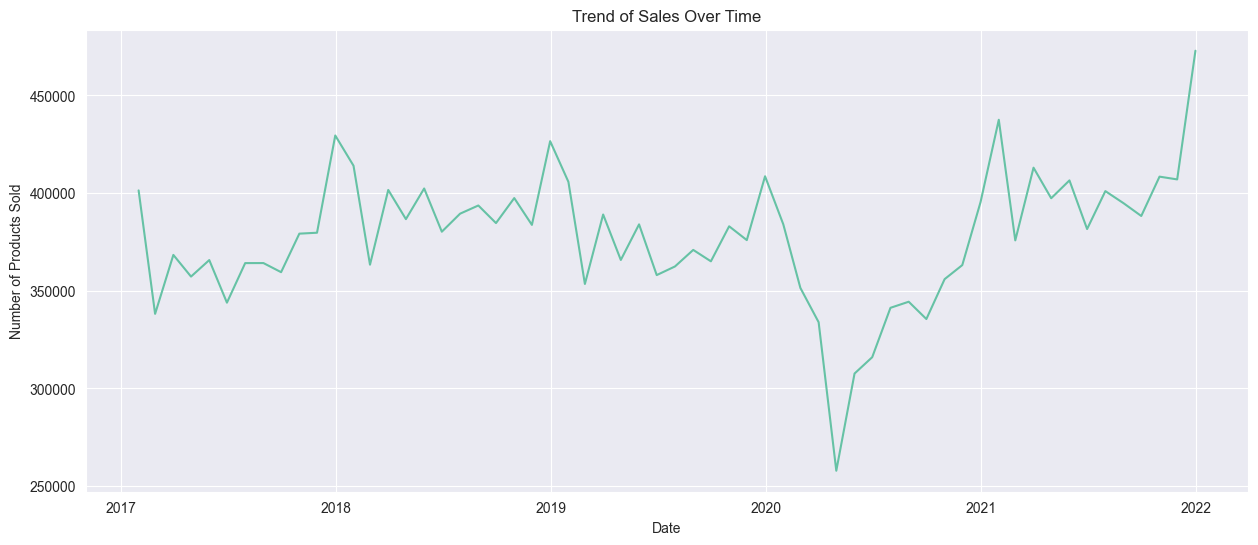

In [59]:
# Convert `date` to datetime format
X_train['date'] = pd.to_datetime(X_train['date'])

# Aggregate sales on a monthly basis
monthly_sales = X_train.resample('M', on='date').sum()['num_sold']

# Plot the trend of sales over time
plt.figure(figsize=(15, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Trend of Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.show()

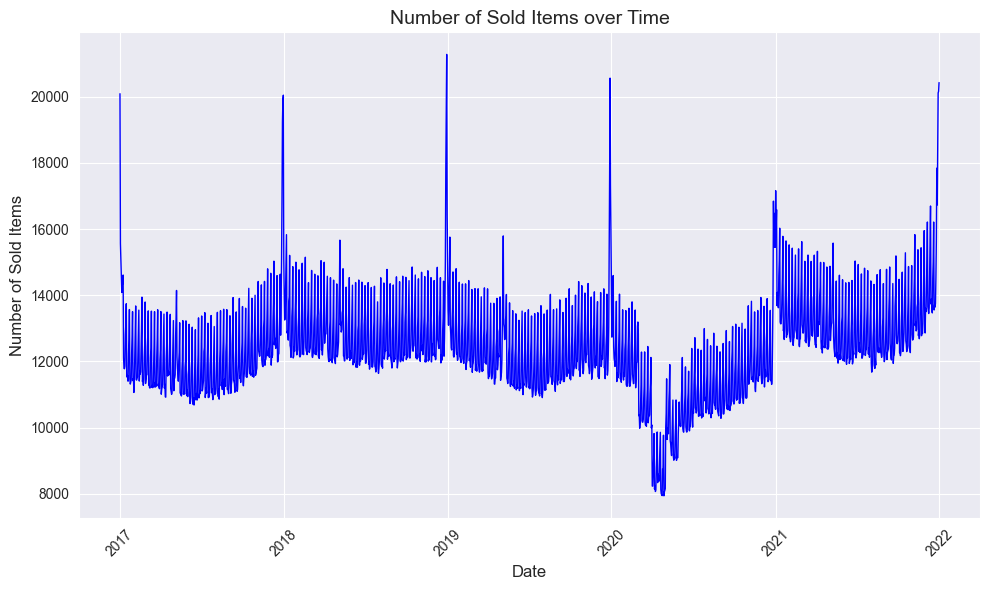

In [60]:
df_sale_per_date = X_train.groupby(["date"])["num_sold"].sum().reset_index()

def plot_sales_over_time(df):
    plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
    
    df['date'] = pd.to_datetime(df['date'])
    data = df.sort_values('date')
    
    plt.plot(data['date'], data['num_sold'], linewidth=1, color='blue')  # Increase line width and specify line color
    
    plt.xlabel('Date', fontsize=12)  # Increase x-axis label font size
    plt.ylabel('Number of Sold Items', fontsize=12)  # Increase y-axis label font size
    plt.title('Number of Sold Items over Time', fontsize=14)  # Increase title font size
    
    plt.xticks(rotation=45, fontsize=10)  # Increase x-axis tick font size and rotation
    plt.yticks(fontsize=10)  # Increase y-axis tick font size
    
    plt.tight_layout()  # Adjust spacing for labels and ticks
    
    plt.show()
    
    
plot_sales_over_time(df_sale_per_date)

In [61]:
def plot_60day_120day_rolling(df):
    # Convert the 'date' column to datetime type
    df['date'] = pd.to_datetime(df['date'])

    # Sort the DataFrame by the 'date' column (if it is not already sorted)
    df = df.sort_values('date')

    # Calculate the rolling averages
    df['rolling_60day'] = df['num_sold'].rolling(window=60).mean()
    df['rolling_120day'] = df['num_sold'].rolling(window=120).mean()

    # Set the style
    sns.set_style("whitegrid")
    sns.set_palette("husl")

    # Create the plot using Seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='date', y='rolling_60day', color='blue', label='60-Day Rolling Average')
    sns.lineplot(data=df, x='date', y='rolling_120day', color='red', label='120-Day Rolling Average')

    # Customize the plot
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Rolling Average', fontsize=12)
    plt.title('Retail Sales - Rolling Averages', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

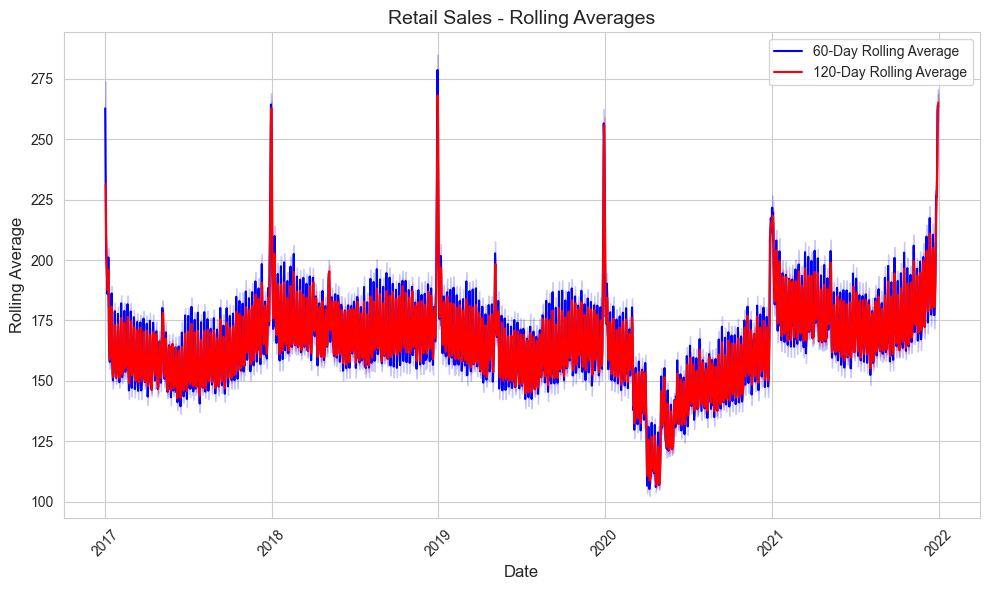

In [62]:
plot_60day_120day_rolling(df = X_train)

In [63]:
def plot_3_month_moving_average(dataframe):
    # Sort the dataframe by date if it's not already sorted
    dataframe_sorted = dataframe.sort_values('date')
    
    # Calculate the three-month moving average using the 'rolling' function
    moving_average = dataframe_sorted['num_sold'].rolling(window=90).mean()
    
    # Create a line plot using Seaborn
    sns.lineplot(data=dataframe_sorted, x='date', y='num_sold', label='Original')
    sns.lineplot(data=dataframe_sorted, x='date', y=moving_average, label='3-Month Moving Average')
    
    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel('Number Sold')
    plt.title('Three-Month Moving Average')
    
    # Display the plot
    plt.show()

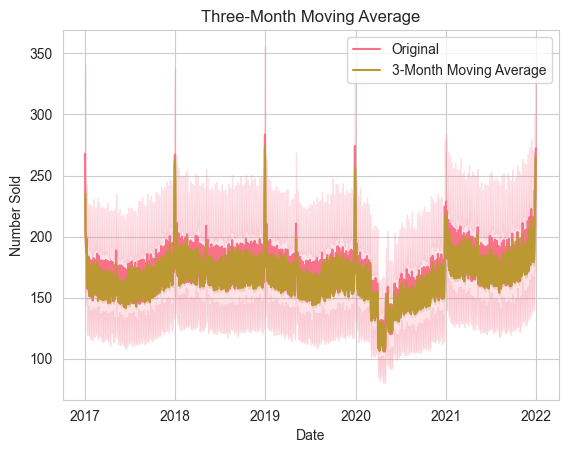

In [64]:
plot_3_month_moving_average(dataframe = X_train)

- Sales by Each year

In [65]:
def plot_sales_by_year(df):
    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Iterate over each year
    for year in df['date'].dt.year.unique():
        # Filter data for the current year
        year_data = df[df['date'].dt.year == year]
        # Group by month and calculate the sum of 'num_sold'
        month_data = year_data.groupby(year_data['date'].dt.month)['num_sold'].sum()
        # Plot the number of sold items for each month
        plt.plot(month_data.index, month_data.values, label=str(year))

    # Set plot title and labels
    plt.title('Number of Items Sold by Year')
    plt.xlabel('Month')
    plt.ylabel('Number of Items Sold')
    plt.xticks(range(1, 13))  # Set x-axis ticks from 1 to 12
    plt.legend()

    # Show the plot
    plt.show()

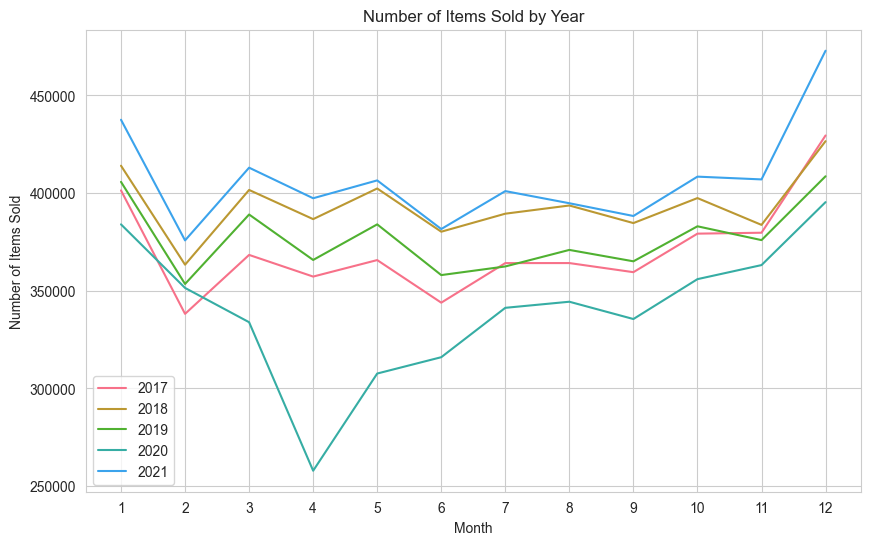

In [66]:
plot_sales_by_year(df=X_train)

In [67]:
X_train.head()

date    country         store                           product  \
0 2017-01-01  Argentina  Kaggle Learn               Improve Your Coding   
1 2017-01-01  Argentina  Kaggle Learn                   Train More LLMs   
2 2017-01-01  Argentina  Kaggle Learn  Win Friends and Influence People   
3 2017-01-01  Argentina  Kaggle Learn      Win More Kaggle Competitions   
4 2017-01-01  Argentina  Kaggle Learn                      Write Better   

   num_sold  year  month  day  week_of_year  day_of_week  inflation  \
0        63  2017      1    1            52            6    1.77648   
1        66  2017      1    1            52            6    1.77648   
2         9  2017      1    1            52            6    1.77648   
3        59  2017      1    1            52            6    1.77648   
4        49  2017      1    1            52            6    1.77648   

   unemployment           gdp  
0         8.347  14613.035649  
1         8.347  14613.035649  
2         8.347  14613.035649  
3         8.347  14613.035649  
4         8.347  14613.035649

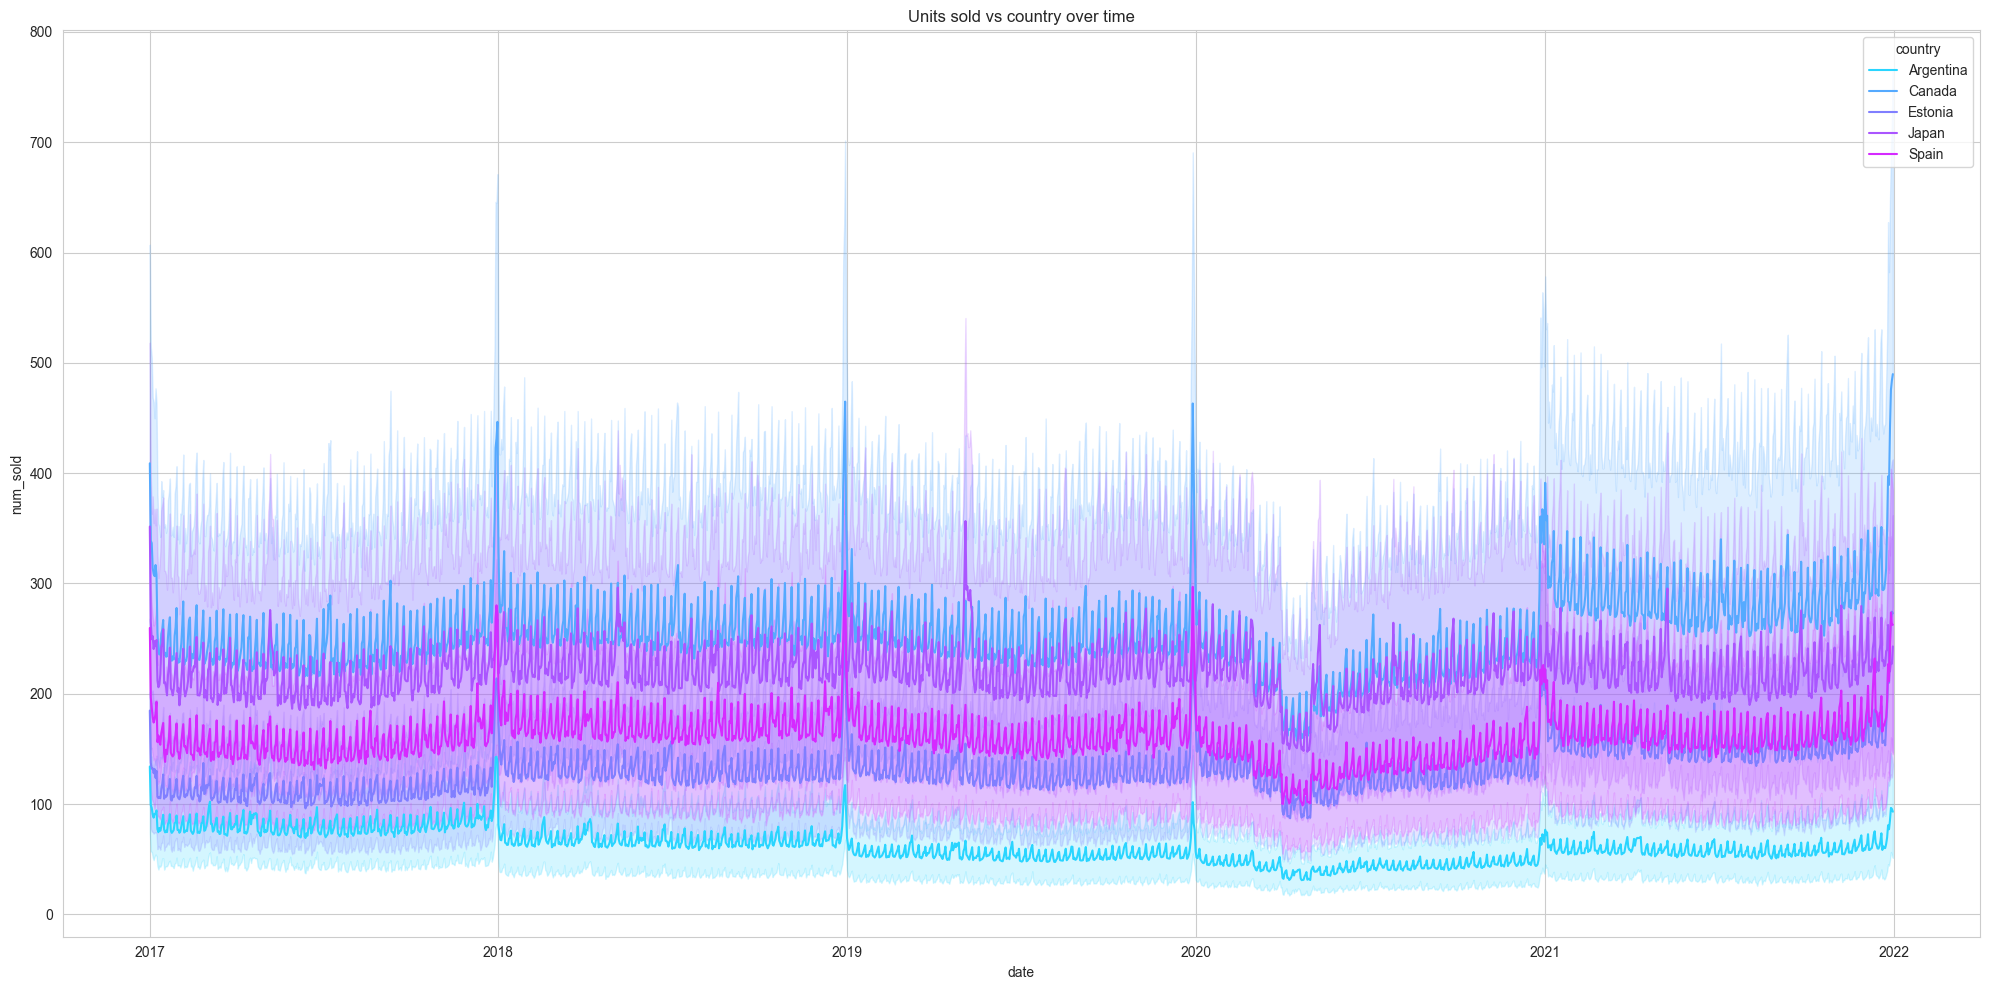

In [68]:
def draw_timeline(X_train, hue, palette):
    plt.figure(figsize=(20, 10))
    sns.lineplot(data=X_train, x='date', y='num_sold', hue=hue, palette=palette)
    plt.title("Units sold vs " + hue + " over time")
    plt.tight_layout()

# Call the function with X_train
draw_timeline(X_train, 'country', 'cool')

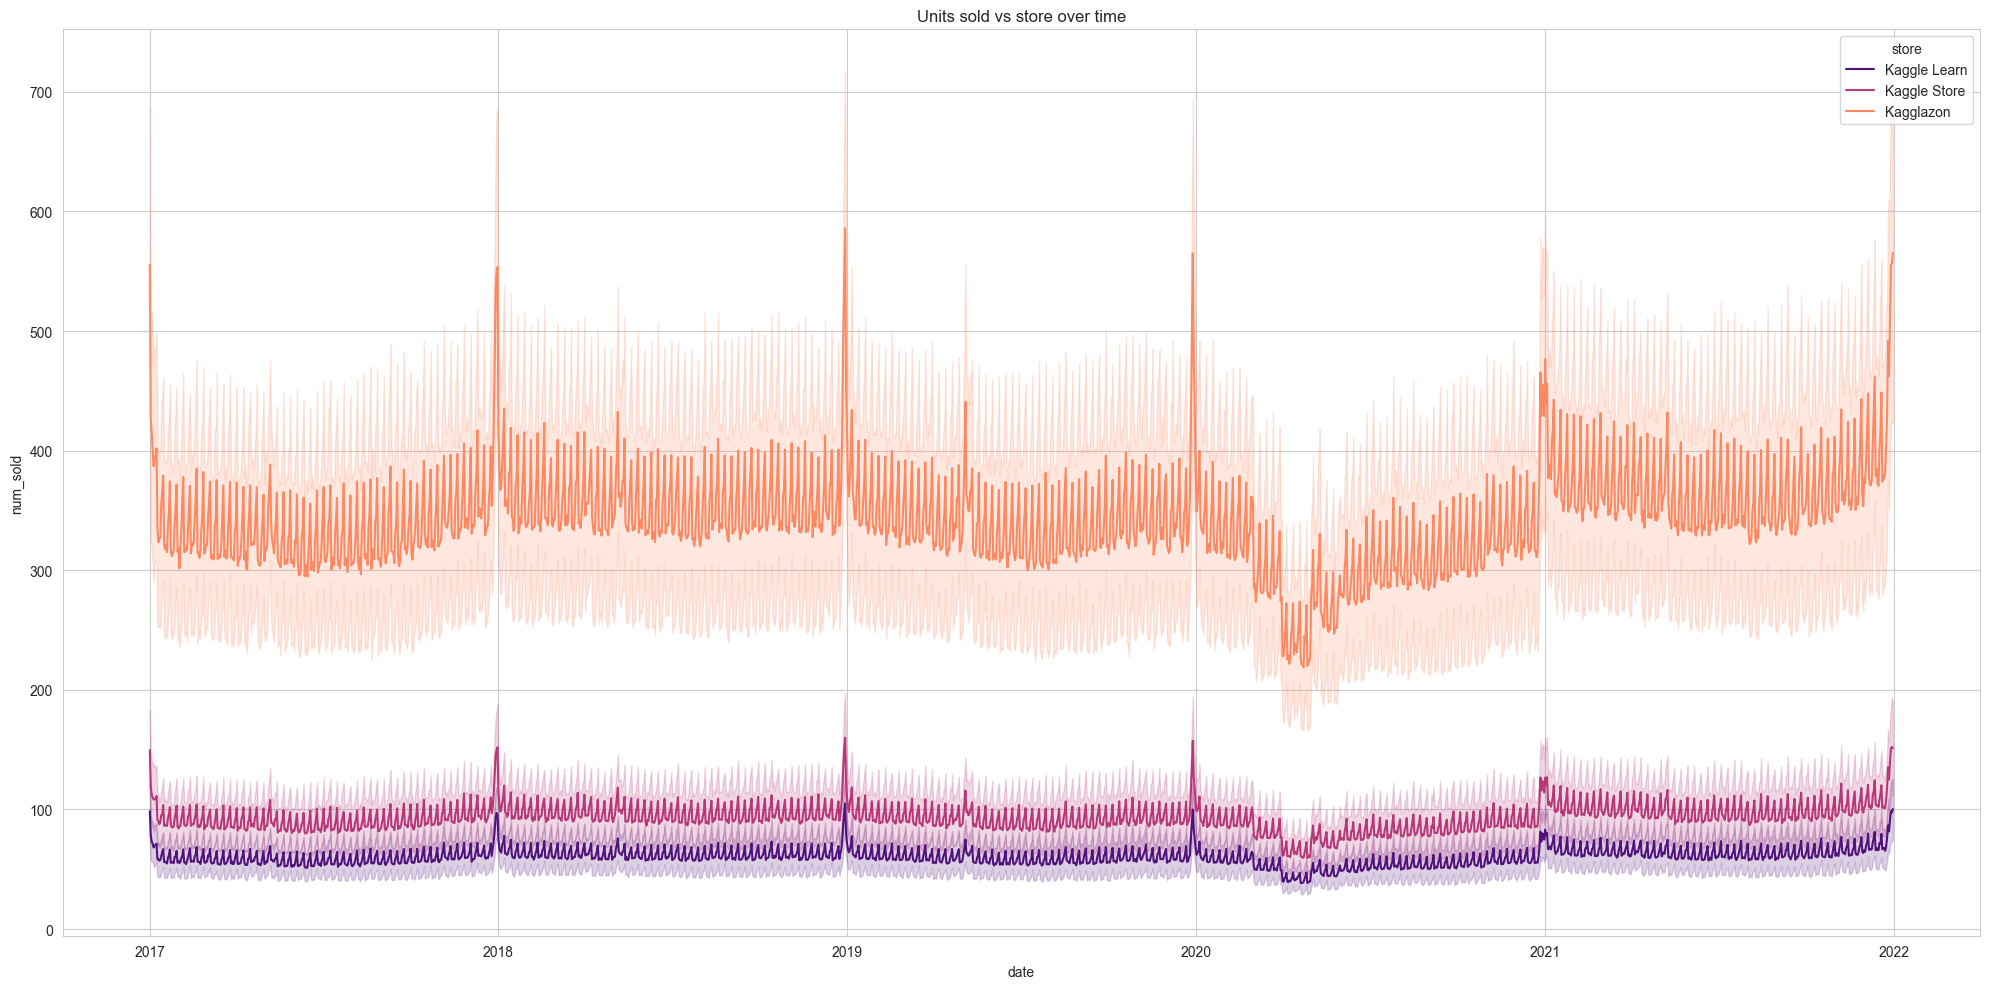

In [69]:
draw_timeline(X_train, 'store', 'magma')

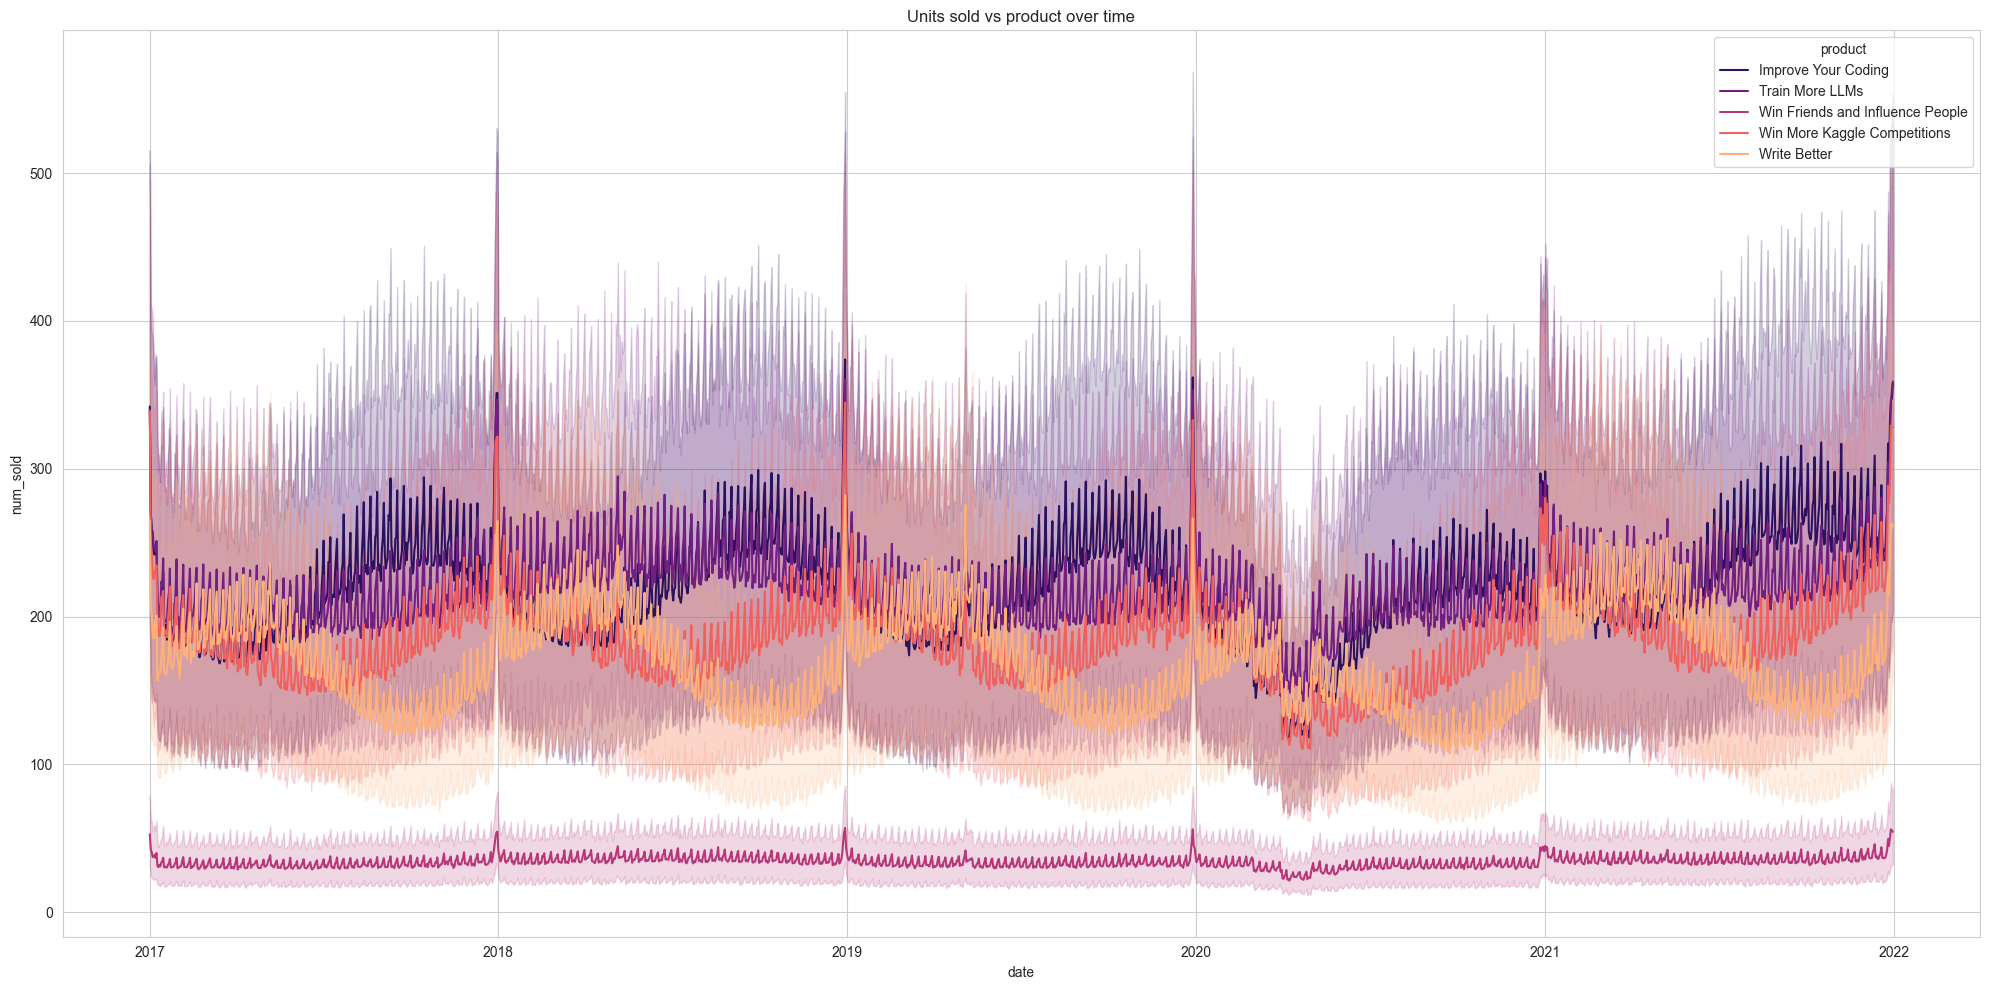

In [70]:
draw_timeline(X_train, 'product', 'magma')

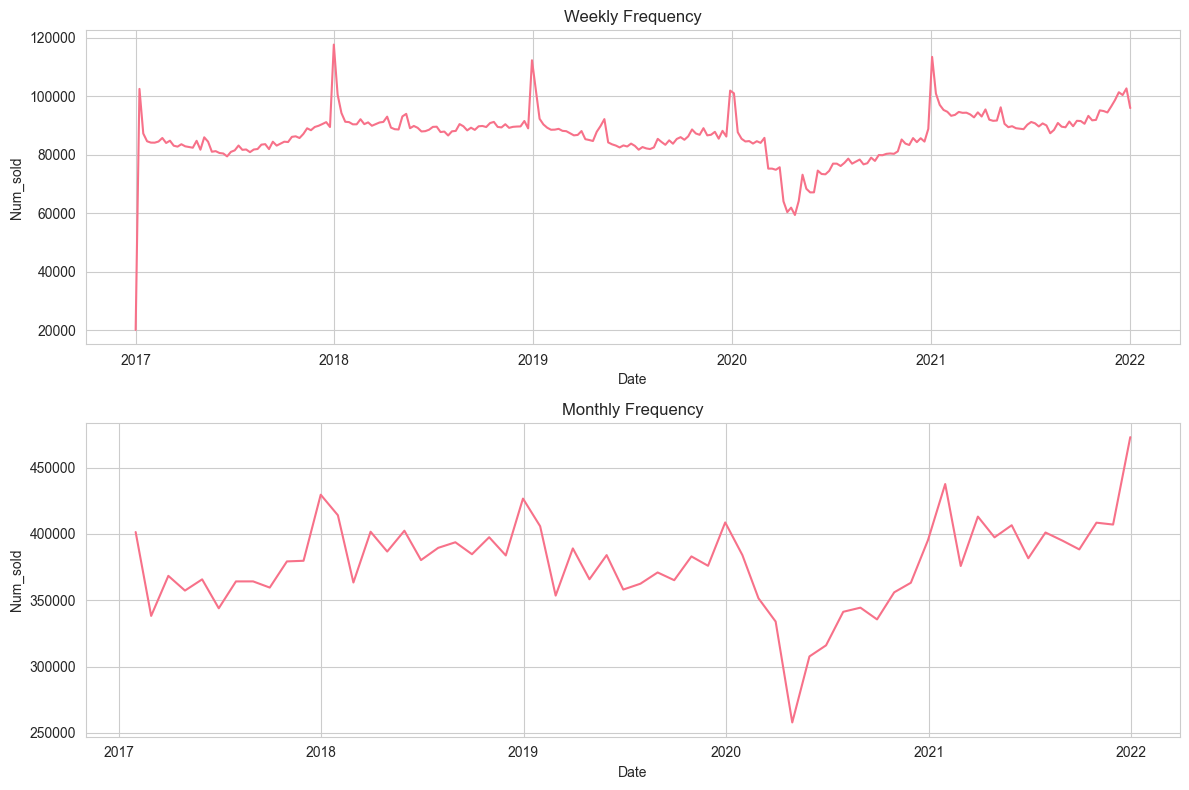

In [70]:
df_sale_per_date = X_train.groupby(["date"])["num_sold"].sum().reset_index()
df_sale_per_date.set_index('date', inplace=True)
data_weekly = df_sale_per_date.resample('W').sum()
data_monthly = df_sale_per_date.resample('M').sum()


fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Weekly plot
axs[0].plot(data_weekly.index, data_weekly['num_sold'])
axs[0].set_title('Weekly Frequency')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Num_sold')

# Monthly plot
axs[1].plot(data_monthly.index, data_monthly['num_sold'])
axs[1].set_title('Monthly Frequency')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Num_sold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

- Holiday

In [72]:
!pip install holidays

You should consider upgrading via the 'c:\users\shiva\desktop\client_project\new_env\scripts\python.exe -m pip install --upgrade pip' command.


In [71]:
import holidays
X_train['country'].unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

In [72]:
X_train.head()

date    country         store                           product  \
0 2017-01-01  Argentina  Kaggle Learn               Improve Your Coding   
1 2017-01-01  Argentina  Kaggle Learn                   Train More LLMs   
2 2017-01-01  Argentina  Kaggle Learn  Win Friends and Influence People   
3 2017-01-01  Argentina  Kaggle Learn      Win More Kaggle Competitions   
4 2017-01-01  Argentina  Kaggle Learn                      Write Better   

   num_sold  year  month  day  week_of_year  day_of_week  inflation  \
0        63  2017      1    1            52            6    1.77648   
1        66  2017      1    1            52            6    1.77648   
2         9  2017      1    1            52            6    1.77648   
3        59  2017      1    1            52            6    1.77648   
4        49  2017      1    1            52            6    1.77648   

   unemployment           gdp  
0         8.347  14613.035649  
1         8.347  14613.035649  
2         8.347  14613.035649  
3         8.347  14613.035649  
4         8.347  14613.035649

In [73]:
X_test.head()

date    country         store                           product  year  \
0 2022-01-01  Argentina  Kaggle Learn               Improve Your Coding  2022   
1 2022-01-01  Argentina  Kaggle Learn                   Train More LLMs  2022   
2 2022-01-01  Argentina  Kaggle Learn  Win Friends and Influence People  2022   
3 2022-01-01  Argentina  Kaggle Learn      Win More Kaggle Competitions  2022   
4 2022-01-01  Argentina  Kaggle Learn                      Write Better  2022   

   month  day  week_of_year  day_of_week  inflation  unemployment  \
0      1    1            52            5   7.596689         6.805   
1      1    1            52            5   7.596689         6.805   
2      1    1            52            5   7.596689         6.805   
3      1    1            52            5   7.596689         6.805   
4      1    1            52            5   7.596689         6.805   

            gdp  
0  13650.604629  
1  13650.604629  
2  13650.604629  
3  13650.604629  
4  13650.604629

In [74]:
def find_holidays_for_countries(df, country_column_label='country', date_column_label='date'):
    df_with_holidays = df.copy()

    # Create a dictionary of holiday sets for each country
    country_holidays = {country: holidays.CountryHoliday(country) for country in df[country_column_label].unique()}

    # Check if each date in the DataFrame is a holiday for the respective country
    df_with_holidays['Holiday'] = df_with_holidays.apply(lambda row: 'Holiday' if row[date_column_label] in country_holidays[row[country_column_label]] else 'Not Holiday', axis=1)

    return df_with_holidays


X_train=find_holidays_for_countries(df=X_train)
X_test=find_holidays_for_countries(df=X_test)

In [75]:
X_train

date    country         store                           product  \
0      2017-01-01  Argentina  Kaggle Learn               Improve Your Coding   
1      2017-01-01  Argentina  Kaggle Learn                   Train More LLMs   
2      2017-01-01  Argentina  Kaggle Learn  Win Friends and Influence People   
3      2017-01-01  Argentina  Kaggle Learn      Win More Kaggle Competitions   
4      2017-01-01  Argentina  Kaggle Learn                      Write Better   
...           ...        ...           ...                               ...   
136945 2021-12-31      Spain     Kagglazon               Improve Your Coding   
136946 2021-12-31      Spain     Kagglazon                   Train More LLMs   
136947 2021-12-31      Spain     Kagglazon  Win Friends and Influence People   
136948 2021-12-31      Spain     Kagglazon      Win More Kaggle Competitions   
136949 2021-12-31      Spain     Kagglazon                      Write Better   

        num_sold  year  month  day  week_of_year  day_of_week  inflation  \
0             63  2017      1    1            52            6   1.776480   
1             66  2017      1    1            52            6   1.776480   
2              9  2017      1    1            52            6   1.776480   
3             59  2017      1    1            52            6   1.776480   
4             49  2017      1    1            52            6   1.776480   
...          ...   ...    ...  ...           ...          ...        ...   
136945       700  2021     12   31            52            4   3.093135   
136946       752  2021     12   31            52            4   3.093135   
136947       111  2021     12   31            52            4   3.093135   
136948       641  2021     12   31            52            4   3.093135   
136949       539  2021     12   31            52            4   3.093135   

        unemployment           gdp      Holiday  
0              8.347  14613.035649      Holiday  
1              8.347  14613.035649      Holiday  
2              8.347  14613.035649      Holiday  
3              8.347  14613.035649      Holiday  
4              8.347  14613.035649      Holiday  
...              ...           ...          ...  
136945        14.781  30488.820953  Not Holiday  
136946        14.781  30488.820953  Not Holiday  
136947        14.781  30488.820953  Not Holiday  
136948        14.781  30488.820953  Not Holiday  
136949        14.781  30488.820953  Not Holiday  

[136950 rows x 14 columns]

- Covid

In [76]:
def add_covid_label(df, year_column="year"):
    # Set the starting year for Covid.
    covid_start_year = 2019

    try:
        # Convert the specified column to numeric (integer) type.
        df[year_column] = pd.to_numeric(df[year_column], downcast="integer")
    except (KeyError, ValueError):
        # Raise an error if the specified column doesn't exist or contains non-numeric values.
        raise ValueError(f"Column '{year_column}' not found or contains non-numeric values.")

    # Create a new column "Covid" based on the values in the specified year_column.
    # If the year is greater than or equal to 2019, assign 1 (Covid), otherwise assign 0 (Not Covid).
    df["Covid"] = df[year_column].apply(lambda year: 1 if year >= covid_start_year else 0)
    
    return df

X_train=add_covid_label(df=X_train)
X_test=add_covid_label(df=X_test)

In [77]:
X_train.head()

date    country         store                           product  \
0 2017-01-01  Argentina  Kaggle Learn               Improve Your Coding   
1 2017-01-01  Argentina  Kaggle Learn                   Train More LLMs   
2 2017-01-01  Argentina  Kaggle Learn  Win Friends and Influence People   
3 2017-01-01  Argentina  Kaggle Learn      Win More Kaggle Competitions   
4 2017-01-01  Argentina  Kaggle Learn                      Write Better   

   num_sold  year  month  day  week_of_year  day_of_week  inflation  \
0        63  2017      1    1            52            6    1.77648   
1        66  2017      1    1            52            6    1.77648   
2         9  2017      1    1            52            6    1.77648   
3        59  2017      1    1            52            6    1.77648   
4        49  2017      1    1            52            6    1.77648   

   unemployment           gdp  Holiday  Covid  
0         8.347  14613.035649  Holiday      0  
1         8.347  14613.035649  Holiday      0  
2         8.347  14613.035649  Holiday      0  
3         8.347  14613.035649  Holiday      0  
4         8.347  14613.035649  Holiday      0

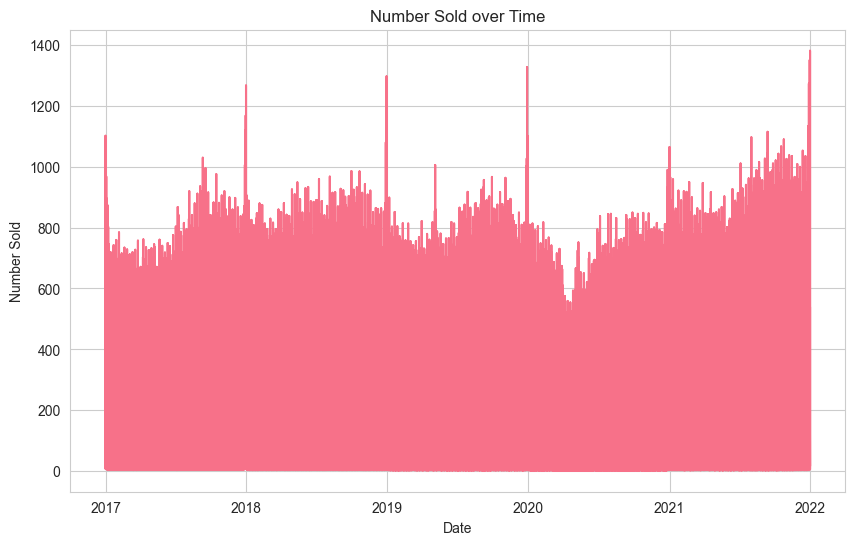

In [78]:
def plot_num_sold(df, date_column, num_sold_column):
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    plt.plot(df[date_column], df[num_sold_column])
    plt.xlabel('Date')
    plt.ylabel('Number Sold')
    plt.title('Number Sold over Time')

    plt.show()
    
plot_num_sold(df=X_train,date_column='date',num_sold_column='num_sold')

In [79]:
X_train.shape

(136950, 15)

In [80]:
y_train=X_train['num_sold']
y_train

0          63
1          66
2           9
3          59
4          49
         ... 
136945    700
136946    752
136947    111
136948    641
136949    539
Name: num_sold, Length: 136950, dtype: int64

In [81]:
X_train = X_train.drop("num_sold", axis="columns")
X_train

date    country         store                           product  \
0      2017-01-01  Argentina  Kaggle Learn               Improve Your Coding   
1      2017-01-01  Argentina  Kaggle Learn                   Train More LLMs   
2      2017-01-01  Argentina  Kaggle Learn  Win Friends and Influence People   
3      2017-01-01  Argentina  Kaggle Learn      Win More Kaggle Competitions   
4      2017-01-01  Argentina  Kaggle Learn                      Write Better   
...           ...        ...           ...                               ...   
136945 2021-12-31      Spain     Kagglazon               Improve Your Coding   
136946 2021-12-31      Spain     Kagglazon                   Train More LLMs   
136947 2021-12-31      Spain     Kagglazon  Win Friends and Influence People   
136948 2021-12-31      Spain     Kagglazon      Win More Kaggle Competitions   
136949 2021-12-31      Spain     Kagglazon                      Write Better   

        year  month  day  week_of_year  day_of_week  inflation  unemployment  \
0       2017      1    1            52            6   1.776480         8.347   
1       2017      1    1            52            6   1.776480         8.347   
2       2017      1    1            52            6   1.776480         8.347   
3       2017      1    1            52            6   1.776480         8.347   
4       2017      1    1            52            6   1.776480         8.347   
...      ...    ...  ...           ...          ...        ...           ...   
136945  2021     12   31            52            4   3.093135        14.781   
136946  2021     12   31            52            4   3.093135        14.781   
136947  2021     12   31            52            4   3.093135        14.781   
136948  2021     12   31            52            4   3.093135        14.781   
136949  2021     12   31            52            4   3.093135        14.781   

                 gdp      Holiday  Covid  
0       14613.035649      Holiday      0  
1       14613.035649      Holiday      0  
2       14613.035649      Holiday      0  
3       14613.035649      Holiday      0  
4       14613.035649      Holiday      0  
...              ...          ...    ...  
136945  30488.820953  Not Holiday      1  
136946  30488.820953  Not Holiday      1  
136947  30488.820953  Not Holiday      1  
136948  30488.820953  Not Holiday      1  
136949  30488.820953  Not Holiday      1  

[136950 rows x 14 columns]

### Feature Engineering and Model Building
- Data Transformation (SplineTransformer)

In [82]:
import sklearn
print(sklearn.__version__)

1.3.2


In [83]:
import numpy
print(numpy.__version__)

1.24.4


In [84]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

- OneHot Encoding

In [85]:
categorical_columns = ['country','store','product','Holiday']

In [86]:
one_hot_encoder = OneHotEncoder(handle_unknown="ignore")

In [87]:
from sklearn.preprocessing import SplineTransformer

def periodic_spline_transformer(period, n_splines=None, degree=3):
    if n_splines is None:
        n_splines = period
    n_knots = n_splines + 1  # periodic and include_bias is True
    return SplineTransformer(
        degree=degree,
        n_knots=n_knots,
        knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
        extrapolation="periodic",
        include_bias=True,
    )
    

- Periodic Cyclic Spline Transformer

In [88]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [89]:
# Define the cyclic spline transformer pipeline
cyclic_spline_transformer_pipeline = ColumnTransformer(
    transformers=[
        ("cyclic_month", periodic_spline_transformer(12, n_splines=6), ["month"]),
        ("cyclic_day", periodic_spline_transformer(31, n_splines=8), ["day"]),
        ("cyclic_day_of_week", periodic_spline_transformer(7, n_splines=4), ["day_of_week"]),
        ("cyclic_week_of_year", periodic_spline_transformer(53, n_splines=6), ["week_of_year"]),
    ]
)

In [90]:
categorical_columns

['country', 'store', 'product', 'Holiday']

In [91]:
def numerical_data(dataframe, categorical_columns=categorical_columns):
    # Identify the numerical columns in the dataframe
    numerical_columns = list(set(dataframe.columns) - set(categorical_columns))

    # Create a new dataframe containing only the numerical columns
    numerical_dataframe = dataframe[numerical_columns]

    return numerical_dataframe

numerical_train_df=numerical_data(dataframe=X_train)
numerical_test_df=numerical_data(dataframe=X_test)

In [92]:
numerical_train_df

day  unemployment       date           gdp  inflation  year  month  \
0         1         8.347 2017-01-01  14613.035649   1.776480  2017      1   
1         1         8.347 2017-01-01  14613.035649   1.776480  2017      1   
2         1         8.347 2017-01-01  14613.035649   1.776480  2017      1   
3         1         8.347 2017-01-01  14613.035649   1.776480  2017      1   
4         1         8.347 2017-01-01  14613.035649   1.776480  2017      1   
...     ...           ...        ...           ...        ...   ...    ...   
136945   31        14.781 2021-12-31  30488.820953   3.093135  2021     12   
136946   31        14.781 2021-12-31  30488.820953   3.093135  2021     12   
136947   31        14.781 2021-12-31  30488.820953   3.093135  2021     12   
136948   31        14.781 2021-12-31  30488.820953   3.093135  2021     12   
136949   31        14.781 2021-12-31  30488.820953   3.093135  2021     12   

        week_of_year  day_of_week  Covid  
0                 52            6      0  
1                 52            6      0  
2                 52            6      0  
3                 52            6      0  
4                 52            6      0  
...              ...          ...    ...  
136945            52            4      1  
136946            52            4      1  
136947            52            4      1  
136948            52            4      1  
136949            52            4      1  

[136950 rows x 10 columns]

In [93]:
numerical_test_df

day  unemployment       date           gdp  inflation  year  month  \
0        1         6.805 2022-01-01  13650.604629   7.596689  2022      1   
1        1         6.805 2022-01-01  13650.604629   7.596689  2022      1   
2        1         6.805 2022-01-01  13650.604629   7.596689  2022      1   
3        1         6.805 2022-01-01  13650.604629   7.596689  2022      1   
4        1         6.805 2022-01-01  13650.604629   7.596689  2022      1   
...    ...           ...        ...           ...        ...   ...    ...   
27370   31        12.917 2022-12-31  29674.544286   8.390576  2022     12   
27371   31        12.917 2022-12-31  29674.544286   8.390576  2022     12   
27372   31        12.917 2022-12-31  29674.544286   8.390576  2022     12   
27373   31        12.917 2022-12-31  29674.544286   8.390576  2022     12   
27374   31        12.917 2022-12-31  29674.544286   8.390576  2022     12   

       week_of_year  day_of_week  Covid  
0                52            5      1  
1                52            5      1  
2                52            5      1  
3                52            5      1  
4                52            5      1  
...             ...          ...    ...  
27370            52            5      1  
27371            52            5      1  
27372            52            5      1  
27373            52            5      1  
27374            52            5      1  

[27375 rows x 10 columns]

In [94]:
def one_hot_encode(df, categorical_column):
    """
    One-hot encodes the specified categorical column in the DataFrame.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        categorical_column (str): The label of the categorical column to be one-hot encoded.

    Returns:
        pandas.DataFrame: The one-hot encoded DataFrame.
    """
    # Copy the original DataFrame to avoid modifying the original data
    df_copy = df.copy()
    # Extract the date column (if present)
    date_column = df_copy['date'].values
    
    df_copy.drop(columns=['date'],axis=1,inplace=True)
    
    
    df_copy=df_copy[categorical_column]



    # Perform one-hot encoding
    one_hot_encoded_df = pd.get_dummies(df_copy, columns=categorical_column)

    # Convert boolean values to integers (0s and 1s)
    one_hot_encoded_df = one_hot_encoded_df.astype(int)
    

    # Concatenate the date column (if present) back to the one-hot encoded DataFrame
    
    one_hot_encoded_df['date'] = date_column

    return one_hot_encoded_df


one_hot_train_encoded_df=one_hot_encode(df=X_train,categorical_column=['product', 'store', 'country', 'Holiday'])
one_hot_test_encoded_df=one_hot_encode(df=X_test,categorical_column=['product', 'store', 'country','Holiday'])

In [95]:
def export_transformed_dataframe(input_dataframe, cyclic_spline_transformer_pipeline=cyclic_spline_transformer_pipeline):
    """
    Apply one-hot encoding and cyclic spline transformation to the input DataFrame.

    Parameters:
        input_dataframe (pd.DataFrame): The DataFrame to be transformed.
        cyclic_spline_transformer_pipeline: The cyclic spline transformer pipeline for non-categorical columns.

    Returns:
        transformed_df (pd.DataFrame): The DataFrame with cyclic spline transformed data.

    """

    # Make a copy of the input DataFrame to avoid modifying the original data
    spline_transform_data = input_dataframe.drop(columns=['product', 'store', 'country', 'Holiday'])

    # Apply the cyclic spline transformer pipeline to the non-categorical data
    transformed_data = cyclic_spline_transformer_pipeline.fit_transform(spline_transform_data)

    # Get the column names for the transformed DataFrame
    transformed_columns = (
        ['cyclic_month_' + str(i) for i in range(6)]
        + ['cyclic_day_' + str(i) for i in range(8)]
        + ['cyclic_day_of_week_' + str(i) for i in range(4)]
        + ['cyclic_week_of_year_' + str(i) for i in range(6)]
    )

    # Create the transformed DataFrame
    transformed_df = pd.DataFrame(transformed_data, columns=transformed_columns)

    return transformed_df

In [96]:
transformed_train_df=export_transformed_dataframe(input_dataframe=X_train)
transformed_test_df=export_transformed_dataframe(input_dataframe=X_test)

In [97]:
X_train = pd.concat([one_hot_train_encoded_df, transformed_train_df,numerical_train_df], axis=1)
X_test = pd.concat([one_hot_test_encoded_df, transformed_test_df,numerical_test_df], axis=1)

In [98]:
X_train.head()

product_Improve Your Coding  product_Train More LLMs  \
0                            1                        0   
1                            0                        1   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   product_Win Friends and Influence People  \
0                                         0   
1                                         0   
2                                         1   
3                                         0   
4                                         0   

   product_Win More Kaggle Competitions  product_Write Better  \
0                                     0                     0   
1                                     0                     0   
2                                     0                     0   
3                                     1                     0   
4                                     0                     1   

   store_Kagglazon  store_Kaggle Learn  store_Kaggle Store  country_Argentina  \
0                0                   1                   0                  1   
1                0                   1                   0                  1   
2                0                   1                   0                  1   
3                0                   1                   0                  1   
4                0                   1                   0                  1   

   country_Canada  ...  day  unemployment       date           gdp  inflation  \
0               0  ...    1         8.347 2017-01-01  14613.035649    1.77648   
1               0  ...    1         8.347 2017-01-01  14613.035649    1.77648   
2               0  ...    1         8.347 2017-01-01  14613.035649    1.77648   
3               0  ...    1         8.347 2017-01-01  14613.035649    1.77648   
4               0  ...    1         8.347 2017-01-01  14613.035649    1.77648   

   year  month  week_of_year  day_of_week  Covid  
0  2017      1            52            6      0  
1  2017      1            52            6      0  
2  2017      1            52            6      0  
3  2017      1            52            6      0  
4  2017      1            52            6      0  

[5 rows x 50 columns]

In [99]:
X_train.columns

Index(['product_Improve Your Coding', 'product_Train More LLMs',
       'product_Win Friends and Influence People',
       'product_Win More Kaggle Competitions', 'product_Write Better',
       'store_Kagglazon', 'store_Kaggle Learn', 'store_Kaggle Store',
       'country_Argentina', 'country_Canada', 'country_Estonia',
       'country_Japan', 'country_Spain', 'Holiday_Holiday',
       'Holiday_Not Holiday', 'date', 'cyclic_month_0', 'cyclic_month_1',
       'cyclic_month_2', 'cyclic_month_3', 'cyclic_month_4', 'cyclic_month_5',
       'cyclic_day_0', 'cyclic_day_1', 'cyclic_day_2', 'cyclic_day_3',
       'cyclic_day_4', 'cyclic_day_5', 'cyclic_day_6', 'cyclic_day_7',
       'cyclic_day_of_week_0', 'cyclic_day_of_week_1', 'cyclic_day_of_week_2',
       'cyclic_day_of_week_3', 'cyclic_week_of_year_0',
       'cyclic_week_of_year_1', 'cyclic_week_of_year_2',
       'cyclic_week_of_year_3', 'cyclic_week_of_year_4',
       'cyclic_week_of_year_5', 'day', 'unemployment', 'date', 'gdp',
    

In [100]:
test_date=X_test['date'].values
train_date=X_train['date'].values

In [101]:
train_date

array([['2017-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000'],
       ['2017-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000'],
       ['2017-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000'],
       ...,
       ['2021-12-31T00:00:00.000000000', '2021-12-31T00:00:00.000000000'],
       ['2021-12-31T00:00:00.000000000', '2021-12-31T00:00:00.000000000'],
       ['2021-12-31T00:00:00.000000000', '2021-12-31T00:00:00.000000000']],
      dtype='datetime64[ns]')

In [102]:
test_date

array([['2022-01-01T00:00:00.000000000', '2022-01-01T00:00:00.000000000'],
       ['2022-01-01T00:00:00.000000000', '2022-01-01T00:00:00.000000000'],
       ['2022-01-01T00:00:00.000000000', '2022-01-01T00:00:00.000000000'],
       ...,
       ['2022-12-31T00:00:00.000000000', '2022-12-31T00:00:00.000000000'],
       ['2022-12-31T00:00:00.000000000', '2022-12-31T00:00:00.000000000'],
       ['2022-12-31T00:00:00.000000000', '2022-12-31T00:00:00.000000000']],
      dtype='datetime64[ns]')

In [103]:
# Drop the 'date' column from the DataFrames
X_train.drop(columns='date', axis=1, inplace=True)
X_test.drop(columns='date', axis=1, inplace=True)

### Scaling Data 

In [104]:
def MinMax_scale_data(X_train, X_test):
    """
    Apply Standard Scaling to all columns in the training and test DataFrames.

    Parameters:
        X_train (pd.DataFrame): Training data features.
        X_test (pd.DataFrame): Test data features.

    Returns:
        scaled_X_train (pd.DataFrame): Standard scaled training data features.
        scaled_X_test (pd.DataFrame): Standard scaled test data features.
    """
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler on the training data and transform all columns
    scaled_X_train = X_train.copy()
    scaled_X_train[X_train.columns] = scaler.fit_transform(X_train)

    # Transform all columns in the test data using the fitted scaler
    scaled_X_test = X_test.copy()
    scaled_X_test[X_test.columns] = scaler.transform(X_test)

    return scaled_X_train, scaled_X_test

# To scale all columns in X_train and X_test
X_train, X_test = MinMax_scale_data(X_train, X_test)

- **Note:**
> **Polynomial Features:** The polynomial features transformation creates new features by taking the polynomial combinations of the original features. For example, with degree 2, it creates combinations like feature1^2, feature1 * feature2, etc. If you apply this transformation before scaling, the resulting polynomial features may have very different scales. This can lead to numerical instability in some algorithms or cause issues with convergence during training.

### Model Pipelines
- Regression Models + Spline

In [105]:
# Models
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
# Utilities
from sklearn.pipeline import make_pipeline

In [106]:
models = {
    "LGBM": LGBMRegressor(),
    "XGBoost": XGBRegressor(eval_metric='rmsle'),
    "CatBoost": CatBoostRegressor(iterations=100, learning_rate=0.1, random_seed=0),
    "Gradient_Boosting":GradientBoostingRegressor(criterion="squared_error", n_estimators=100, learning_rate=0.1)
}

In [107]:
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

In [108]:
def fit(X_train, y_train):
    # Define the models to be trained
    models = {
        "LGBM": LGBMRegressor(),
        "XGBoost": XGBRegressor(eval_metric='rmsle'),
        "CatBoost": CatBoostRegressor(iterations=100, learning_rate=0.1, random_seed=0)
    }

    # Perform time series cross-validation with 5 splits
    tscv = TimeSeriesSplit(n_splits=5)
    results = []

    # Loop over each split and train the models
    for train_index, test_index in tscv.split(X_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

        for model_name, model in models.items():
            # Train the model on the training data
            model.fit(X_tr, y_tr)

            # Make predictions on the validation data
            y_pred = model.predict(X_val)

            # Calculate SMAPE score for the predictions
            smape_score = smape(y_val, y_pred)
            results.append((model_name, smape_score))

    # Create a DataFrame to store the results
    df_results = pd.DataFrame(results, columns=["Model", "SMAPE"])

    # Calculate the mean SMAPE score for each model across different splits
    mean_smape = df_results.groupby("Model")["SMAPE"].mean().reset_index()

    # Find the top model based on the lowest mean SMAPE score
    top_model = mean_smape.nsmallest(1, "SMAPE")["Model"].values[0]
    best_model = models[top_model]

    # Save the best model in the form of a dictionary with a specific key
    best_model_dict = {top_model: best_model}

    # Return the mean SMAPE scores and the best model dictionary
    return mean_smape, best_model_dict

In [109]:
df_results,best_model=fit(X_train,y_train)

0:	learn: 156.2863843	total: 212ms	remaining: 21s
1:	learn: 142.0510510	total: 235ms	remaining: 11.5s
2:	learn: 129.2986022	total: 256ms	remaining: 8.26s
3:	learn: 117.8388959	total: 278ms	remaining: 6.67s
4:	learn: 107.4162571	total: 302ms	remaining: 5.73s
5:	learn: 98.2913282	total: 319ms	remaining: 5s
6:	learn: 90.0871622	total: 337ms	remaining: 4.48s
7:	learn: 82.7416575	total: 356ms	remaining: 4.09s
8:	learn: 76.4678973	total: 369ms	remaining: 3.73s
9:	learn: 70.7719277	total: 378ms	remaining: 3.4s
10:	learn: 65.5700582	total: 389ms	remaining: 3.15s
11:	learn: 60.9384898	total: 398ms	remaining: 2.92s
12:	learn: 56.6744661	total: 405ms	remaining: 2.71s
13:	learn: 53.1024099	total: 416ms	remaining: 2.55s
14:	learn: 49.8765523	total: 425ms	remaining: 2.41s
15:	learn: 46.9496808	total: 434ms	remaining: 2.28s
16:	learn: 44.4982606	total: 442ms	remaining: 2.16s
17:	learn: 41.8923533	total: 452ms	remaining: 2.06s
18:	learn: 39.8410785	total: 461ms	remaining: 1.97s
19:	learn: 37.7625389	t

In [110]:
df_results

Model      SMAPE
0  CatBoost  13.526141
1      LGBM  11.890027
2   XGBoost  11.106067

In [111]:
best_model

{'XGBoost': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='rmsle',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)}

In [112]:
models = {
    "LGBM": LGBMRegressor(),
    "XGBoost": XGBRegressor(eval_metric='rmsle'),
    "CatBoost": CatBoostRegressor(iterations=100, learning_rate=0.1, random_seed=0)
}

params = {
    "LGBM": {
        'num_leaves': [15, 31, 63, 127],    
        'learning_rate': [0.01, 0.05, 0.1, 0.2],  
        'n_estimators': [50, 100, 200, 300]   
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300, 400],   
        'learning_rate': [0.01, 0.05, 0.1, 0.2],  
        'max_depth': [3, 5, 7, 9],   
        'base_score': [0.5, 0.6, 0.7]   
    },
    "CatBoost": {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],   
        'depth': [6, 8, 10, 12],   
        'l2_leaf_reg': [1, 3, 5, 7]   
    }
}

In [113]:
def fit(best_model, params, X_train, Y_train):
    best_models = {}

    for model_name, model_obj in best_model.items():
        param_grid = params.get(model_name)

        if param_grid is None:
            raise ValueError(f"No hyperparameters found for {model_name}")

        grid_search = GridSearchCV(model_obj, param_grid, cv=3)
        grid_search.fit(X_train, Y_train)

        best_model_with_params = grid_search.best_estimator_
        best_model_with_params.fit(X_train, Y_train)

        best_models[model_name] = best_model_with_params

    return best_models

model = fit(best_model, params, X_train, Y_train=y_train)

In [114]:
print(model)

{'XGBoost': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmsle',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)}


In [115]:
def predict_on_test(best_model, X_test):
    results_df = pd.DataFrame()

    model_names = list(best_model.keys())  # Extract model names from the dictionary keys.

    for model_name in model_names:
        model = best_model[model_name]
        y_pred = model.predict(X_test)
        results_df[f"{model_name}"] = y_pred

    return results_df

predictions = predict_on_test(best_model=model,X_test= X_test)

In [116]:
predictions['date']=test_date[:, 0]

In [117]:
predictions

XGBoost       date
0       60.037910 2022-01-01
1       61.439545 2022-01-01
2        9.450252 2022-01-01
3       57.361332 2022-01-01
4       47.485748 2022-01-01
...           ...        ...
27370  702.045410 2022-12-31
27371  697.401367 2022-12-31
27372  119.887932 2022-12-31
27373  660.959595 2022-12-31
27374  538.126526 2022-12-31

[27375 rows x 2 columns]

- Train Date

In [118]:
train_data=pd.DataFrame()
train_data['date'] = train_date[:, 0]
train_data['num_sold']=y_train

In [119]:
train_data

date  num_sold
0      2017-01-01        63
1      2017-01-01        66
2      2017-01-01         9
3      2017-01-01        59
4      2017-01-01        49
...           ...       ...
136945 2021-12-31       700
136946 2021-12-31       752
136947 2021-12-31       111
136948 2021-12-31       641
136949 2021-12-31       539

[136950 rows x 2 columns]

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_predictions(combined_df, column_labels, model_name):
    combined_df['date'] = pd.to_datetime(combined_df['date'])
    
    # Define the train_end_date
    train_end_date = '2021-12-31'
    
    # Split the data into train and test sets based on the train_end_date
    train_data = combined_df[combined_df['date'] <= train_end_date]
    test_data = combined_df[combined_df['date'] > train_end_date]
    
    # Define custom color palettes for train and test data
    train_colors = sns.color_palette('tab10', n_colors=len(column_labels))
    test_colors = sns.color_palette('Set2', n_colors=len(column_labels))
    
    # Plot the train data with custom colors
    plt.figure(figsize=(10, 6))
    for i, column_label in enumerate(column_labels):
        sns.lineplot(data=train_data, x='date', y=column_label, label=f'Train Data ({column_label})', color=train_colors[i])
    
    # Plot the test data with custom colors
    for i, column_label in enumerate(column_labels):
        sns.lineplot(data=test_data, x='date', y=column_label, label=f'Test Data ({column_label})', color=test_colors[i])
    
    plt.title(f'{model_name} Predictions', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Prediction', fontsize=12)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
    plt.grid(True)
    plt.ylim(bottom=0)  # Set the y-axis minimum to 0 or any other desired value
    plt.xlim(train_data['date'].min(), test_data['date'].max())  # Set the x-axis limits
    plt.tight_layout()
    plt.show()

In [121]:
test_data=pd.DataFrame()
test_data['date']=test_date[:, 0]
test_data

date
0     2022-01-01
1     2022-01-01
2     2022-01-01
3     2022-01-01
4     2022-01-01
...          ...
27370 2022-12-31
27371 2022-12-31
27372 2022-12-31
27373 2022-12-31
27374 2022-12-31

[27375 rows x 1 columns]

In [122]:
train_data

date  num_sold
0      2017-01-01        63
1      2017-01-01        66
2      2017-01-01         9
3      2017-01-01        59
4      2017-01-01        49
...           ...       ...
136945 2021-12-31       700
136946 2021-12-31       752
136947 2021-12-31       111
136948 2021-12-31       641
136949 2021-12-31       539

[136950 rows x 2 columns]

In [123]:
predictions

XGBoost       date
0       60.037910 2022-01-01
1       61.439545 2022-01-01
2        9.450252 2022-01-01
3       57.361332 2022-01-01
4       47.485748 2022-01-01
...           ...        ...
27370  702.045410 2022-12-31
27371  697.401367 2022-12-31
27372  119.887932 2022-12-31
27373  660.959595 2022-12-31
27374  538.126526 2022-12-31

[27375 rows x 2 columns]

 ---------------------------
 Model : XGBoost


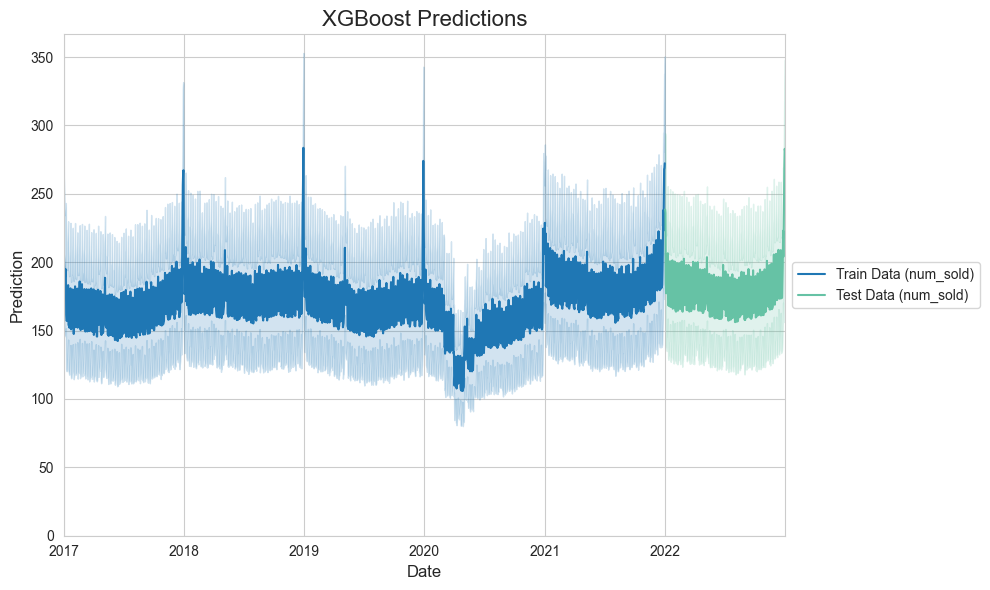

In [124]:
def prediction_plot(df: pd.DataFrame):
    for column in df.columns:
        if column != 'date':
            
            train_data['date'] = train_data['date']
            train_data['num_sold'] = y_train
            
            
            test_data['date'] = test_data['date']
            test_data['num_sold'] = df[column].values
            
            combined_df = pd.concat([train_data, test_data], axis=0)
            
            print(" ---------------------------")
            
            print(f" Model : {column}")

            
           
            
            plot_predictions(combined_df=combined_df, column_labels=['num_sold'],model_name=column)
        
#prediction_plot(df=prediction_df)      
prediction_plot(df=predictions)  

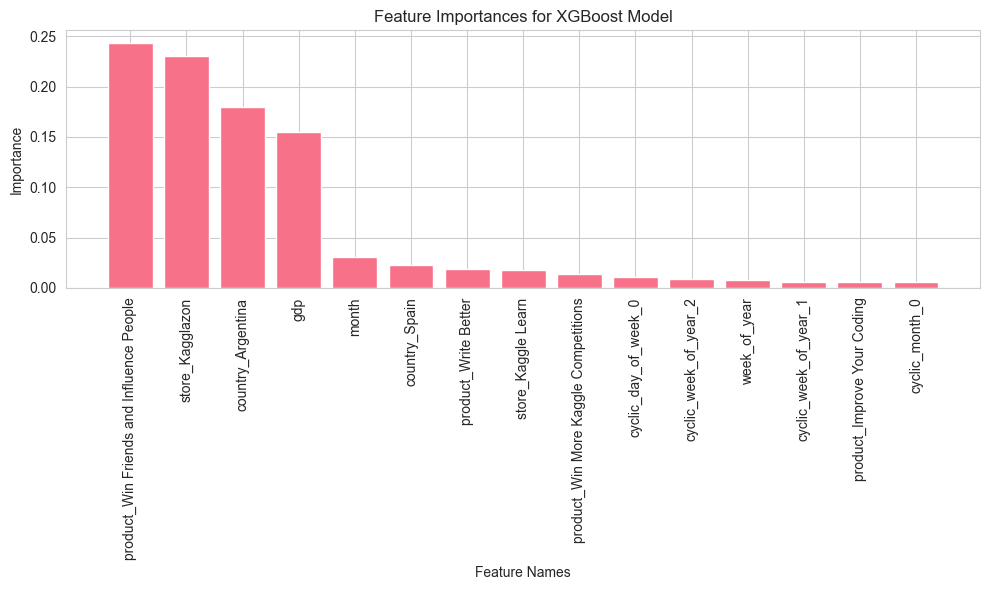

In [125]:
def plot_feature_importance(model, X_train=X_train, title=None, top_n=15):
    """
    Plot feature importances for a given model.

    Parameters:
        model: A trained model that supports feature importances (e.g., Random Forest, Decision Trees, Linear Regression).
        X_train (pd.DataFrame): Training data features.
        title (str): Optional title for the plot.
        top_n (int): Number of top features to plot.

    Returns:
        None (plots the feature importance bar plot).
    """
    # Get feature importances from the model
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_)
    else:
        raise ValueError("Model does not have attribute 'feature_importances_' or 'coef_'.")

    # Get feature names from the training data column names
    feature_names = X_train.columns

    # Sort feature importances in descending order
    sorted_indices = np.argsort(importances)[::-1]
    sorted_importances = importances[sorted_indices]
    sorted_feature_names = np.array(feature_names)[sorted_indices]

    # Get the top n feature importances and names
    top_sorted_importances = sorted_importances[:top_n]
    top_sorted_feature_names = sorted_feature_names[:top_n]

    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_sorted_importances)), top_sorted_importances, tick_label=top_sorted_feature_names)
    plt.xticks(rotation=90)
    plt.xlabel('Feature Names')
    plt.ylabel('Importance')
    if title:
        plt.title(title)
    plt.tight_layout()
    plt.show()
for model_name, best_model in best_model.items():
    plot_feature_importance(best_model, X_train, title=f'Feature Importances for {model_name} Model')

# Happy Learning!